# <font color='#000086'>1. Data Exploration</font> <a class="anchor" id="second-bullet"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date

In [2]:
UpColours = pd.read_excel('Group07_UpColours_Cluster.xlsx')

In [3]:
UpColours.head(20)

,Custid,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSculpt,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Group
0,70003082,1993,PhD,Single,113023.0,0,0,2019-04-18,6,1014.0,...,4,8,1,0,0,0,0,0,0,Group07
1,70003084,1982,PhD,Single,93571.0,0,1,2018-07-22,10,639.0,...,5,13,5,0,0,0,0,0,0,Group07
2,70003085,1978,PhD,Single,91852.0,0,1,2018-02-03,26,806.0,...,9,11,6,0,0,0,1,0,0,Group07
3,70003087,1979,PhD,Married,69485.0,1,1,2017-12-07,73,293.0,...,4,6,7,0,0,0,0,0,0,Group07
4,70003089,1988,PhD,Single,109499.0,0,0,2018-10-31,75,639.0,...,7,11,1,0,0,1,0,0,0,Group07
5,70003092,1983,Master,Divorced,75436.0,0,1,2018-10-05,32,353.0,...,4,10,3,0,0,0,0,0,0,Group07
6,70003093,1987,Graduation,Married,95586.0,0,0,2019-03-15,54,455.0,...,8,8,3,1,0,0,1,0,0,Group07
7,70003094,1962,PhD,Together,57997.0,1,1,2019-04-22,28,75.0,...,3,3,5,0,0,0,0,0,0,Group07
8,70003096,1988,PhD,Married,37029.0,1,0,2019-03-17,30,6.0,...,2,3,6,0,0,0,0,0,0,Group07
9,70003098,1964,Graduation,Together,112765.0,0,0,2018-06-05,72,465.0,...,13,11,5,0,0,0,0,0,0,Group07


In [4]:
#there are no duplicate rows, so we don't need to drop the duplicates
UpColours[UpColours.duplicated (keep=False)]

,Custid,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSculpt,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Group


In [5]:
# We droped the last column which was the group number and that was not relevant
# Instead of using the .drop {UpColours1 = UpColours.drop(['Group'],axis=1)} we used del which deletes directly in the dataset
del UpColours['Group']
UpColours

,Custid,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSculpt,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain
0,70003082,1993,PhD,Single,113023.0,0,0,2019-04-18,6,1014.0,...,9,4,8,1,0,0,0,0,0,0
1,70003084,1982,PhD,Single,93571.0,0,1,2018-07-22,10,639.0,...,13,5,13,5,0,0,0,0,0,0
2,70003085,1978,PhD,Single,91852.0,0,1,2018-02-03,26,806.0,...,15,9,11,6,0,0,0,1,0,0
3,70003087,1979,PhD,Married,69485.0,1,1,2017-12-07,73,293.0,...,11,4,6,7,0,0,0,0,0,0
4,70003089,1988,PhD,Single,109499.0,0,0,2018-10-31,75,639.0,...,11,7,11,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,70013075,1963,Graduation,Single,58121.0,1,1,2018-03-12,6,39.0,...,9,2,3,8,0,0,0,0,0,0
4996,70013077,1985,Graduation,Together,125962.0,0,1,2019-04-04,75,1221.0,...,11,7,5,5,0,1,1,0,0,0
4997,70013078,1977,PhD,Married,99628.0,0,0,2019-05-25,98,810.0,...,11,7,12,3,0,0,0,0,0,0
4998,70013079,1982,Graduation,Married,111018.0,1,0,2019-05-13,4,778.0,...,16,6,6,4,0,0,0,0,0,0


In [6]:
UpColours.shape

(5000, 26)

In [7]:
# To check the labels of the columns
UpColours.columns

Index(['Custid', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntSculpt',
       'MntWriting', 'MntPaint', 'MntAudioV', 'MntMusic', 'MntLimited',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'Complain'],
      dtype='object')

In [8]:
#Statistical information
UpColours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Custid               5000 non-null   int64         
 1   Year_Birth           5000 non-null   int64         
 2   Education            5000 non-null   object        
 3   Marital_Status       5000 non-null   object        
 4   Income               4953 non-null   float64       
 5   Kidhome              5000 non-null   int64         
 6   Teenhome             5000 non-null   int64         
 7   Dt_Customer          5000 non-null   datetime64[ns]
 8   Recency              5000 non-null   int64         
 9   MntSculpt            5000 non-null   float64       
 10  MntWriting           5000 non-null   float64       
 11  MntPaint             4899 non-null   float64       
 12  MntAudioV            4919 non-null   float64       
 13  MntMusic             5000 non-nul

In [9]:
UpColours.isna().sum()

Custid                   0
Year_Birth               0
Education                0
Marital_Status           0
Income                  47
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntSculpt                0
MntWriting               0
MntPaint               101
MntAudioV               81
MntMusic                 0
MntLimited               0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp1             0
AcceptedCmp2             0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
Complain                 0
dtype: int64

In [10]:
#to see if we have any column that is almost all null we checked the percentage, we don´t
UpColours.isna().sum()/len(UpColours)*100

Custid                 0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 0.94
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntSculpt              0.00
MntWriting             0.00
MntPaint               2.02
MntAudioV              1.62
MntMusic               0.00
MntLimited             0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
Complain               0.00
dtype: float64

In [11]:
UpColours.describe()

,Custid,Year_Birth,Income,Kidhome,Teenhome,Recency,MntSculpt,MntWriting,MntPaint,MntAudioV,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain
count,5.000000e+03,5000.000000,4953.000000,5000.00000,5000.00000,5000.00000,5000.000000,5000.000000,4899.000000,4919.000000,...,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,7.000808e+07,1973.782800,70076.648117,0.43900,0.50060,49.17880,368.669060,26.992480,185.530333,32.932100,...,10.182400,4.60140,5.804600,5.207000,0.08000,0.069600,0.080400,0.067000,0.014600,0.011600
std,2.891261e+03,11.800384,28950.589423,0.54216,0.54668,28.95136,400.929113,40.296252,238.244236,48.245884,...,3.296741,2.81249,3.288857,2.503239,0.27132,0.254497,0.271939,0.250047,0.119957,0.107088
min,7.000308e+07,1946.000000,2286.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000556e+07,1964.000000,47968.000000,0.00000,0.00000,24.00000,30.000000,2.000000,18.000000,3.000000,...,8.000000,2.00000,3.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000807e+07,1975.000000,70320.000000,0.00000,0.00000,49.00000,221.000000,8.950000,76.000000,11.000000,...,10.000000,4.00000,5.000000,5.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001060e+07,1983.000000,92185.000000,1.00000,1.00000,74.00000,610.000000,34.000000,263.500000,41.000000,...,12.000000,6.00000,8.000000,7.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.001308e+07,2001.000000,190618.125000,2.00000,2.00000,99.00000,1799.000000,199.000000,1093.000000,239.000000,...,31.000000,13.00000,13.000000,18.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
UpColours.describe(include=['O'])

,Education,Marital_Status
count,5000,5000
unique,4,5
top,PhD,Married
freq,2613,2032


In [13]:
UpColours['Education'].value_counts()

PhD           2613
Graduation    1456
Master         888
2n Cycle        43
Name: Education, dtype: int64

In [14]:
UpColours['Marital_Status'].value_counts()

Married     2032
Together    1270
Single      1075
Divorced     464
Widow        159
Name: Marital_Status, dtype: int64

In [15]:
# How many rows have null values and which ones have missing values
UpColours.isnull().any(axis=1).sum()
Null_Rows = UpColours[UpColours.isnull().any(axis = 1)]
Null_Rows

,Custid,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSculpt,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain
19,70003115,1977,PhD,Single,66220.0,1,2,2018-05-26,70,237.0,...,10,3,6,7,1,0,0,0,0,1
46,70003166,1966,Graduation,Together,79899.0,0,1,2018-05-26,43,910.0,...,13,8,13,6,0,0,0,0,0,0
57,70003183,1991,Graduation,Married,101642.0,0,0,2018-05-03,54,759.0,...,11,9,9,4,0,1,1,0,0,0
59,70003191,1976,PhD,Married,NaN,1,0,2019-02-25,78,26.0,...,8,2,4,5,0,0,0,0,0,0
70,70003217,1957,Graduation,Single,100096.0,0,1,2018-01-24,83,700.0,...,11,6,8,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874,70012832,1968,PhD,Married,21315.0,1,1,2017-08-16,97,12.0,...,8,3,3,7,0,0,0,0,0,0
4896,70012872,1967,PhD,Divorced,52154.0,0,1,2018-05-09,87,590.0,...,11,10,4,6,1,0,0,0,0,0
4903,70012888,1971,Master,Single,71870.0,0,1,2019-04-13,13,128.0,...,7,4,6,1,0,0,0,0,0,0
4954,70012995,1993,Graduation,Married,89817.0,0,0,2019-06-14,96,130.0,...,8,6,12,1,0,0,0,0,0,0


In [16]:
UpColours_copy = UpColours.copy()
UpColours_copy['UpColours_rows'] = UpColours_copy.isnull().sum(axis=1)
UpColours_copy['UpColours_rows']

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: UpColours_rows, Length: 5000, dtype: int64

In [17]:
# To check the maximum of missing values per row
UpColours_copy['UpColours_rows'].max()

2

In [18]:
#Calculating the age of each customer from the year of birth
UpColours['Customer_Age'] = date.today().year - UpColours['Year_Birth']
UpColours.drop(labels=['Year_Birth'],axis=1,inplace=True)
UpColours

,Custid,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSculpt,MntWriting,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Customer_Age
0,70003082,PhD,Single,113023.0,0,0,2019-04-18,6,1014.0,15.0,...,4,8,1,0,0,0,0,0,0,28
1,70003084,PhD,Single,93571.0,0,1,2018-07-22,10,639.0,88.0,...,5,13,5,0,0,0,0,0,0,39
2,70003085,PhD,Single,91852.0,0,1,2018-02-03,26,806.0,56.0,...,9,11,6,0,0,0,1,0,0,43
3,70003087,PhD,Married,69485.0,1,1,2017-12-07,73,293.0,24.0,...,4,6,7,0,0,0,0,0,0,42
4,70003089,PhD,Single,109499.0,0,0,2018-10-31,75,639.0,126.0,...,7,11,1,0,0,1,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,70013075,Graduation,Single,58121.0,1,1,2018-03-12,6,39.0,3.0,...,2,3,8,0,0,0,0,0,0,58
4996,70013077,Graduation,Together,125962.0,0,1,2019-04-04,75,1221.0,33.0,...,7,5,5,0,1,1,0,0,0,36
4997,70013078,PhD,Married,99628.0,0,0,2019-05-25,98,810.0,0.0,...,7,12,3,0,0,0,0,0,0,44
4998,70013079,Graduation,Married,111018.0,1,0,2019-05-13,4,778.0,22.0,...,6,6,4,0,0,0,0,0,0,39


In [19]:
UpColours_corr = UpColours[['Customer_Age','Income','Kidhome','Teenhome','MntPaint','MntSculpt','MntMusic','MntWriting','MntAudioV','MntLimited']].corr()
UpColours_corr

,Customer_Age,Income,Kidhome,Teenhome,MntPaint,MntSculpt,MntMusic,MntWriting,MntAudioV,MntLimited
Customer_Age,1.000000,0.189158,-0.246818,0.359467,0.067123,0.158621,0.029885,0.008840,0.004577,0.033509
Income,0.189158,1.000000,-0.479068,0.008882,0.673918,0.670205,0.503739,0.500812,0.498291,0.304496
Kidhome,-0.246818,-0.479068,1.000000,-0.048471,-0.432840,-0.460863,-0.296978,-0.349550,-0.340978,-0.249781
Teenhome,0.359467,0.008882,-0.048471,1.000000,-0.294675,-0.036626,-0.167519,-0.210380,-0.199557,-0.043420
MntPaint,0.067123,0.673918,-0.432840,-0.294675,1.000000,0.604734,0.478048,0.578877,0.578530,0.282216
MntSculpt,0.158621,0.670205,-0.460863,-0.036626,0.604734,1.000000,0.302463,0.390085,0.385022,0.280832
MntMusic,0.029885,0.503739,-0.296978,-0.167519,0.478048,0.302463,1.000000,0.483517,0.456822,0.426281
MntWriting,0.008840,0.500812,-0.349550,-0.210380,0.578877,0.390085,0.483517,1.000000,0.571325,0.281514
MntAudioV,0.004577,0.498291,-0.340978,-0.199557,0.578530,0.385022,0.456822,0.571325,1.000000,0.280938
MntLimited,0.033509,0.304496,-0.249781,-0.043420,0.282216,0.280832,0.426281,0.281514,0.280938,1.000000


<AxesSubplot:>

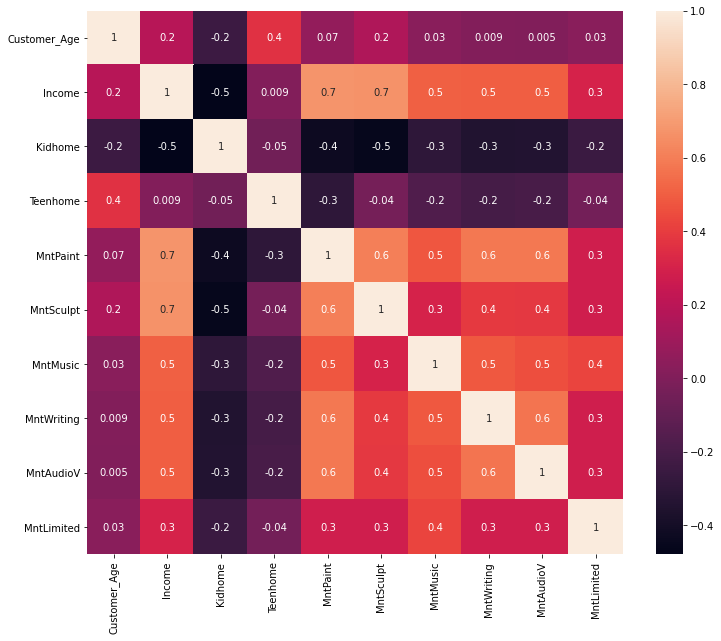

In [20]:
figure = plt.figure(figsize=(12,10))
sns.heatmap(UpColours_corr, annot=True, fmt = '.1g')

# <font color='#000086'>2. Data Preprocessing</font> <a class="anchor" id="second-bullet"></a> 

### <font color='#f0690a'>Data Preparation and Data Cleaning</font> <a class="anchor" id="second-bullet"></a>

In [21]:
#Make a copy of the dataset and changed the name of the Custid column to ID
UpColours07 = UpColours.copy()
UpColours07.rename(columns = {'Custid':'ID'}, inplace=True)
UpColours07.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSculpt,MntWriting,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Customer_Age
0,70003082,PhD,Single,113023.0,0,0,2019-04-18,6,1014.0,15.0,...,4,8,1,0,0,0,0,0,0,28
1,70003084,PhD,Single,93571.0,0,1,2018-07-22,10,639.0,88.0,...,5,13,5,0,0,0,0,0,0,39
2,70003085,PhD,Single,91852.0,0,1,2018-02-03,26,806.0,56.0,...,9,11,6,0,0,0,1,0,0,43
3,70003087,PhD,Married,69485.0,1,1,2017-12-07,73,293.0,24.0,...,4,6,7,0,0,0,0,0,0,42
4,70003089,PhD,Single,109499.0,0,0,2018-10-31,75,639.0,126.0,...,7,11,1,0,0,1,0,0,0,33


In [22]:
#Check data types
UpColours07.dtypes

ID                              int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntSculpt                     float64
MntWriting                    float64
MntPaint                      float64
MntAudioV                     float64
MntMusic                      float64
MntLimited                    float64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
Complain                        int64
Customer_Age                    int64
dtype: objec

In [23]:
UpColours07['Marital_Status'].replace(to_replace='Together', value='Married', inplace=True)
# UpColours07['Marital_Status'].value_counts()
UpColours07['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

In [24]:
#Converted the Dt_Customer column into a new column with only the year that the customer's enrolment with the company
#Droped the Dt_Customer (datetime format) column so we were able to perform the next steps
# Created another column with the years that the customers have been enrolled in the company
from datetime import date

UpColours07['Dt_Customer_Year'] = pd.DatetimeIndex(UpColours07['Dt_Customer']).year
UpColours07.drop(labels=['Dt_Customer'],axis=1,inplace=True)
UpColours07['YearsInCompany'] = date.today().year - UpColours07['Dt_Customer_Year']

UpColours07.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntSculpt,MntWriting,MntPaint,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Customer_Age,Dt_Customer_Year,YearsInCompany
0,70003082,PhD,Single,113023.0,0,0,6,1014.0,15.0,643.0,...,1,0,0,0,0,0,0,28,2019,2
1,70003084,PhD,Single,93571.0,0,1,10,639.0,88.0,185.0,...,5,0,0,0,0,0,0,39,2018,3
2,70003085,PhD,Single,91852.0,0,1,26,806.0,56.0,350.0,...,6,0,0,0,1,0,0,43,2018,3
3,70003087,PhD,Married,69485.0,1,1,73,293.0,24.0,49.0,...,7,0,0,0,0,0,0,42,2017,4
4,70003089,PhD,Single,109499.0,0,0,75,639.0,126.0,539.0,...,1,0,0,1,0,0,0,33,2018,3


### <font color='#f0690a'>Check and Fill in missing values</font> <a class="anchor" id="second-bullet"></a>

In [25]:
#There is no missing values in the categorical data(if it was the case - we would have filled in with the mode), 
# only in the numerical variables(so, we will fill in with the KNN approach)
UpColours07.isna().sum()

ID                       0
Education                0
Marital_Status           0
Income                  47
Kidhome                  0
Teenhome                 0
Recency                  0
MntSculpt                0
MntWriting               0
MntPaint               101
MntAudioV               81
MntMusic                 0
MntLimited               0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp1             0
AcceptedCmp2             0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
Complain                 0
Customer_Age             0
Dt_Customer_Year         0
YearsInCompany           0
dtype: int64

In [26]:
#Create two variables to separate the data: (1st) with categorical data and year dates (2nd) with numerical data to normalize
UpColours07_1st= UpColours07[['ID','Education','Marital_Status','Dt_Customer_Year','YearsInCompany']].copy()
UpColours07_1st.head()

,ID,Education,Marital_Status,Dt_Customer_Year,YearsInCompany
0,70003082,PhD,Single,2019,2
1,70003084,PhD,Single,2018,3
2,70003085,PhD,Single,2018,3
3,70003087,PhD,Married,2017,4
4,70003089,PhD,Single,2018,3


In [27]:
UpColours07_2nd = UpColours07.drop(labels = ['Education','Marital_Status','Dt_Customer_Year','YearsInCompany'], axis=1)
UpColours07_2nd.head()

,ID,Income,Kidhome,Teenhome,Recency,MntSculpt,MntWriting,MntPaint,MntAudioV,MntMusic,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Customer_Age
0,70003082,113023.0,0,0,6,1014.0,15.0,643.0,74.0,36.0,...,4,8,1,0,0,0,0,0,0,28
1,70003084,93571.0,0,1,10,639.0,88.0,185.0,64.0,53.0,...,5,13,5,0,0,0,0,0,0,39
2,70003085,91852.0,0,1,26,806.0,56.0,350.0,54.0,54.0,...,9,11,6,0,0,0,1,0,0,43
3,70003087,69485.0,1,1,73,293.0,24.0,49.0,4.0,33.0,...,4,6,7,0,0,0,0,0,0,42
4,70003089,109499.0,0,0,75,639.0,126.0,539.0,152.0,152.0,...,7,11,1,0,0,1,0,0,0,33


In [28]:
# Normalize the data before the KNN imputation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
UpColours07_2nd_Normalized = pd.DataFrame(scaler.fit_transform(UpColours07_2nd), columns = UpColours07_2nd.columns)
UpColours07_2nd_Normalized.head()

,ID,Income,Kidhome,Teenhome,Recency,MntSculpt,MntWriting,MntPaint,MntAudioV,MntMusic,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Customer_Age
0,0.0000,0.587988,0.0,0.0,0.060606,0.563646,0.075377,0.588289,0.309623,0.114286,...,0.307692,0.615385,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.145455
1,0.0002,0.484702,0.0,0.5,0.101010,0.355197,0.442211,0.169259,0.267782,0.168254,...,0.384615,1.000000,0.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.345455
2,0.0003,0.475575,0.0,0.5,0.262626,0.448027,0.281407,0.320220,0.225941,0.171429,...,0.692308,0.846154,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.418182
3,0.0005,0.356811,0.5,0.5,0.737374,0.162868,0.120603,0.044831,0.016736,0.104762,...,0.307692,0.461538,0.388889,0.0,0.0,0.0,0.0,0.0,0.0,0.400000
4,0.0007,0.569276,0.0,0.0,0.757576,0.355197,0.633166,0.493138,0.635983,0.482540,...,0.538462,0.846154,0.055556,0.0,0.0,1.0,0.0,0.0,0.0,0.236364


In [29]:
#From Scikit-Learn’s impute package
#Using the nearest neighbors imputation statistical model,KNNImputer to fill in the missing values in the NORMALIZED DATA
#KNN Imputer does not recognize text data values
from sklearn.impute import KNNImputer

In [30]:
UpColours_Imputer = KNNImputer(n_neighbors=5)
UpColours_Imputed = UpColours_Imputer.fit_transform(UpColours07_2nd_Normalized)

In [31]:
UpColours07_2nd_Normalized_Imputed = pd.DataFrame(UpColours_Imputed, columns = UpColours07_2nd_Normalized.columns)
UpColours07_2nd_Normalized_Imputed.head()

,ID,Income,Kidhome,Teenhome,Recency,MntSculpt,MntWriting,MntPaint,MntAudioV,MntMusic,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Customer_Age
0,0.0000,0.587988,0.0,0.0,0.060606,0.563646,0.075377,0.588289,0.309623,0.114286,...,0.307692,0.615385,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.145455
1,0.0002,0.484702,0.0,0.5,0.101010,0.355197,0.442211,0.169259,0.267782,0.168254,...,0.384615,1.000000,0.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.345455
2,0.0003,0.475575,0.0,0.5,0.262626,0.448027,0.281407,0.320220,0.225941,0.171429,...,0.692308,0.846154,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.418182
3,0.0005,0.356811,0.5,0.5,0.737374,0.162868,0.120603,0.044831,0.016736,0.104762,...,0.307692,0.461538,0.388889,0.0,0.0,0.0,0.0,0.0,0.0,0.400000
4,0.0007,0.569276,0.0,0.0,0.757576,0.355197,0.633166,0.493138,0.635983,0.482540,...,0.538462,0.846154,0.055556,0.0,0.0,1.0,0.0,0.0,0.0,0.236364


In [32]:
# Invert the normalized data, to its original data forms
UpColours07_2nd_Imputed = pd.DataFrame(scaler.inverse_transform(UpColours07_2nd_Normalized_Imputed), columns = UpColours07_2nd_Normalized_Imputed.columns)
UpColours07_2nd_Imputed.head()

,ID,Income,Kidhome,Teenhome,Recency,MntSculpt,MntWriting,MntPaint,MntAudioV,MntMusic,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Customer_Age
0,70003082.0,113023.0,0.0,0.0,6.0,1014.0,15.0,643.0,74.0,36.0,...,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
1,70003084.0,93571.0,0.0,1.0,10.0,639.0,88.0,185.0,64.0,53.0,...,5.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
2,70003085.0,91852.0,0.0,1.0,26.0,806.0,56.0,350.0,54.0,54.0,...,9.0,11.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0
3,70003087.0,69485.0,1.0,1.0,73.0,293.0,24.0,49.0,4.0,33.0,...,4.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
4,70003089.0,109499.0,0.0,0.0,75.0,639.0,126.0,539.0,152.0,152.0,...,7.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,33.0


In [33]:
UpColours07_2nd_Imputed.isna().sum()

ID                     0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntSculpt              0
MntWriting             0
MntPaint               0
MntAudioV              0
MntMusic               0
MntLimited             0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Complain               0
Customer_Age           0
dtype: int64

In [34]:
# Joined back the data, now with NO missing values
UpColours07_FillIn = pd.merge(UpColours07_1st, UpColours07_2nd_Imputed, on='ID')
UpColours07_FillIn

,ID,Education,Marital_Status,Dt_Customer_Year,YearsInCompany,Income,Kidhome,Teenhome,Recency,MntSculpt,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Customer_Age
0,70003082,PhD,Single,2019,2,113023.0,0.0,0.0,6.0,1014.0,...,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
1,70003084,PhD,Single,2018,3,93571.0,0.0,1.0,10.0,639.0,...,5.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
2,70003085,PhD,Single,2018,3,91852.0,0.0,1.0,26.0,806.0,...,9.0,11.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0
3,70003087,PhD,Married,2017,4,69485.0,1.0,1.0,73.0,293.0,...,4.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
4,70003089,PhD,Single,2018,3,109499.0,0.0,0.0,75.0,639.0,...,7.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,70013075,Graduation,Single,2018,3,58121.0,1.0,1.0,6.0,39.0,...,2.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0
4996,70013077,Graduation,Married,2019,2,125962.0,0.0,1.0,75.0,1221.0,...,7.0,5.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,36.0
4997,70013078,PhD,Married,2019,2,99628.0,0.0,0.0,98.0,810.0,...,7.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
4998,70013079,Graduation,Married,2019,2,111018.0,1.0,0.0,4.0,778.0,...,6.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0


In [35]:
UpColours07_FillIn.dtypes

ID                       int64
Education               object
Marital_Status          object
Dt_Customer_Year         int64
YearsInCompany           int64
Income                 float64
Kidhome                float64
Teenhome               float64
Recency                float64
MntSculpt              float64
MntWriting             float64
MntPaint               float64
MntAudioV              float64
MntMusic               float64
MntLimited             float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth      float64
AcceptedCmp1           float64
AcceptedCmp2           float64
AcceptedCmp3           float64
AcceptedCmp4           float64
AcceptedCmp5           float64
Complain               float64
Customer_Age           float64
dtype: object

### <font color='#f0690a'>Detect and Remove Outliers</font> <a class="anchor" id="second-bullet"></a>

In [36]:
# With no more missing values in the data, we separated them again in categorical and numerical data, 
#because zscore doesn´t work with categorical data, only floats and integers
### Took the ID column out of the numerical data because later we are going to concat them again and this functions uses the indexes to join them

UpColours07_Cat = UpColours07_FillIn[['ID','Education','Marital_Status','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']].copy()
UpColours07_Num = UpColours07_FillIn.drop(labels = ['Education','Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain'], axis=1)

In [37]:
UpColours07_Num.columns

Index(['ID', 'Dt_Customer_Year', 'YearsInCompany', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntSculpt', 'MntWriting', 'MntPaint',
       'MntAudioV', 'MntMusic', 'MntLimited', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Customer_Age'],
      dtype='object')

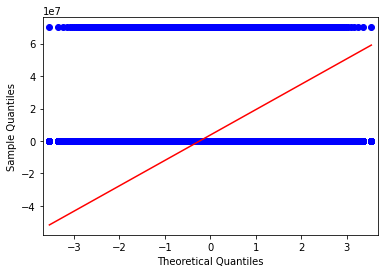

In [38]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(UpColours07_Num, line='s')
pyplot.show()

In [39]:
UpColours07_Num.skew()

ID                    -0.003532
Dt_Customer_Year      -0.063135
YearsInCompany         0.063135
Income                 0.070161
Kidhome                0.691654
Teenhome               0.445927
Recency                0.008632
MntSculpt              1.151230
MntWriting             2.091995
MntPaint               1.659129
MntAudioV              2.049075
MntMusic               2.351501
MntLimited             2.305624
NumDealsPurchases      2.085547
NumWebPurchases        1.350054
NumCatalogPurchases    1.023874
NumStorePurchases      0.623148
NumWebVisitsMonth      0.115281
Customer_Age           0.114269
dtype: float64

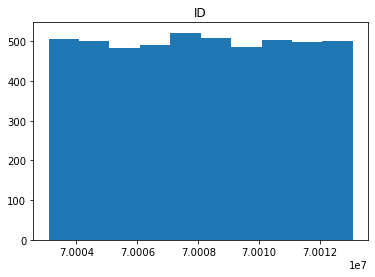

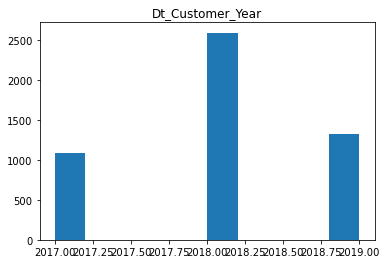

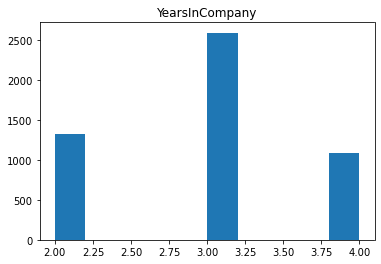

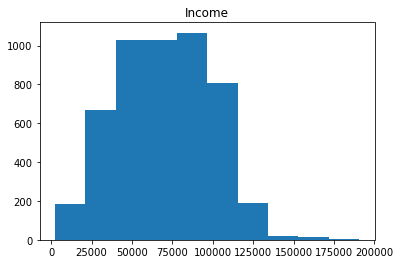

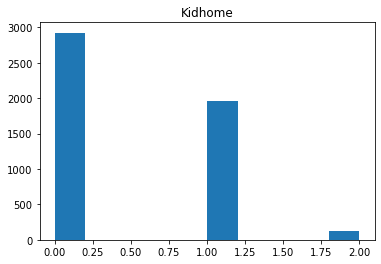

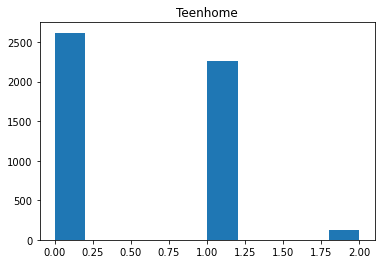

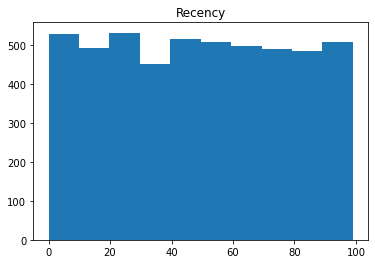

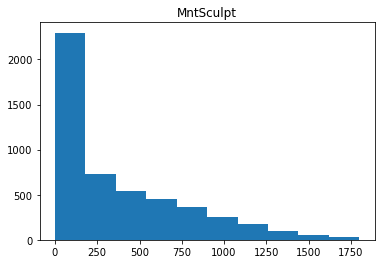

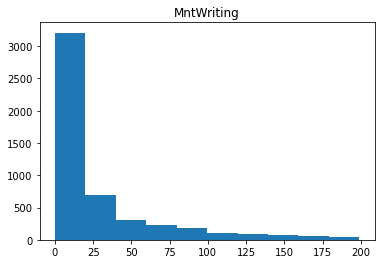

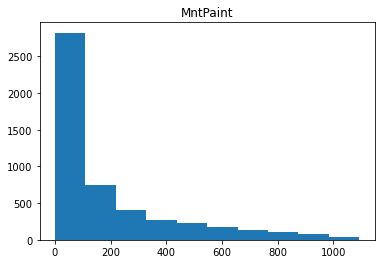

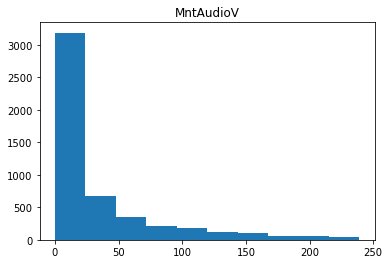

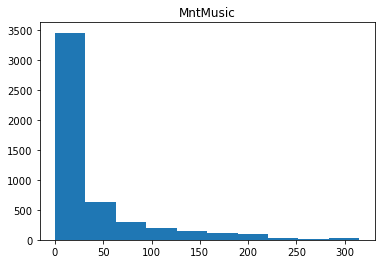

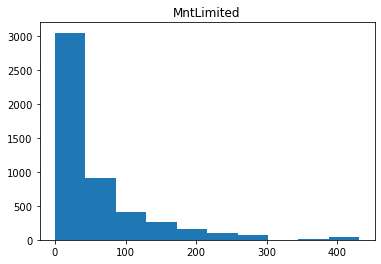

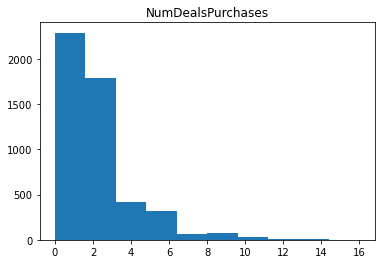

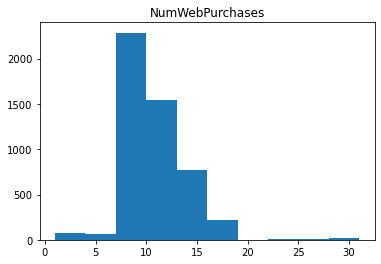

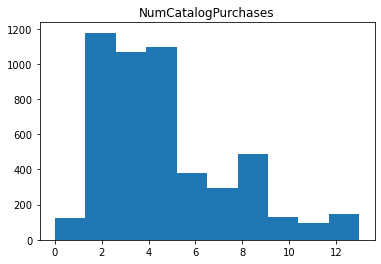

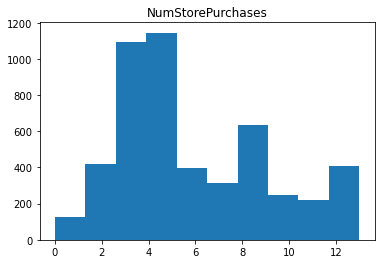

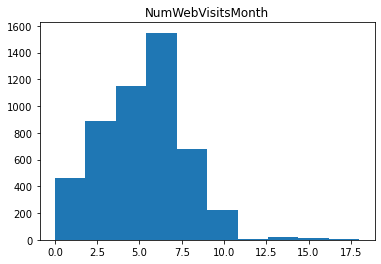

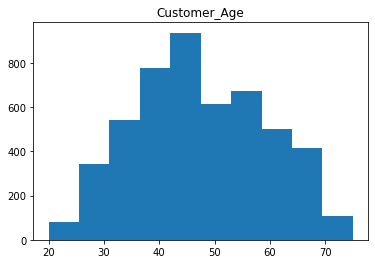

In [40]:
# histogram plot
from matplotlib import pyplot
for column in UpColours07_Num.columns:
    plt.hist(UpColours07_Num[column])
    #plt.axvline(UpColours07_Num[column])
    plt.title(column)
    plt.show()

In [41]:
# Data_with_outliers ---- use this one to remove the outliers (ALL DATA)
UpColours07_with_outliers = UpColours07_FillIn.copy()
#Created this one to identify the outliers bc doesn't has categoriacal data or the others
DataOutliers = UpColours07_FillIn.drop(labels = ['ID','Dt_Customer_Year','Customer_Age','YearsInCompany','Recency','Kidhome', 'Teenhome','Education','Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain'], axis=1)

(5000, 12)

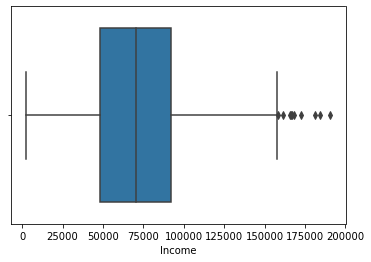

In [42]:
sns.boxplot(x='Income', data = DataOutliers)
#sns.set(rc={'figure.figsize':(20,2)})
DataOutliers.shape

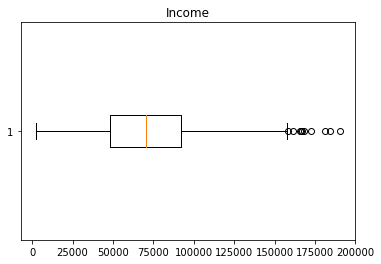

<Figure size 1440x576 with 0 Axes>

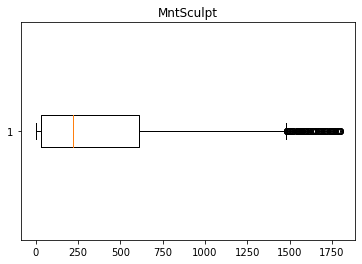

<Figure size 1440x576 with 0 Axes>

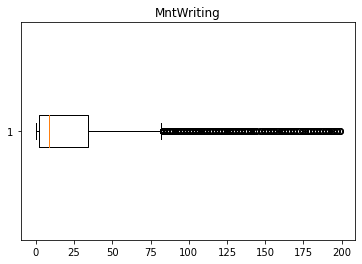

<Figure size 1440x576 with 0 Axes>

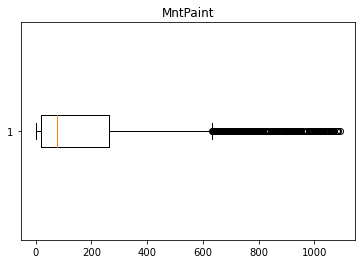

<Figure size 1440x576 with 0 Axes>

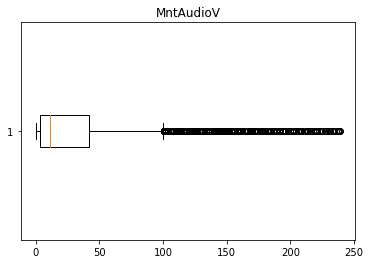

<Figure size 1440x576 with 0 Axes>

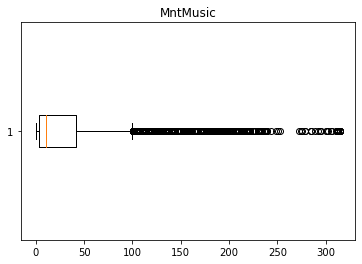

<Figure size 1440x576 with 0 Axes>

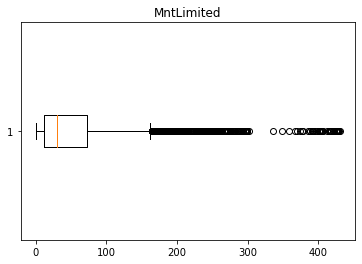

<Figure size 1440x576 with 0 Axes>

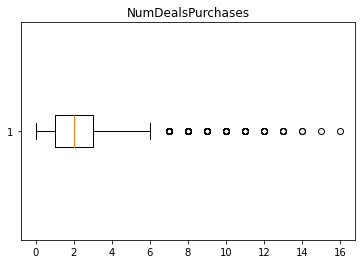

<Figure size 1440x576 with 0 Axes>

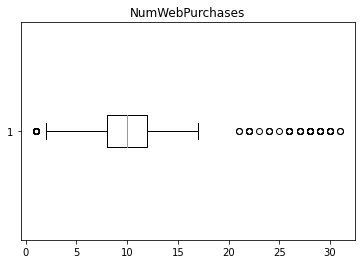

<Figure size 1440x576 with 0 Axes>

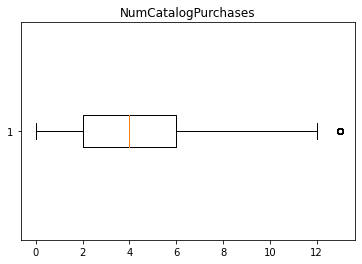

<Figure size 1440x576 with 0 Axes>

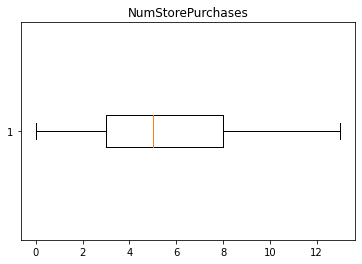

<Figure size 1440x576 with 0 Axes>

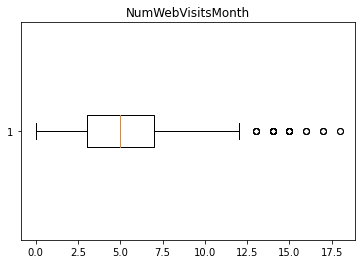

<Figure size 1440x576 with 0 Axes>

In [43]:
for column in DataOutliers.columns:
    plt.boxplot(DataOutliers[column], vert=False)
    plt.title(column)
    plt.figure(figsize=(20,8))
    plt.tight_layout()
    plt.show()

In [44]:
UpColours07_No_Outliers =  UpColours07_with_outliers[(UpColours07_with_outliers['Income'] < 158600)& #9
                                            (UpColours07_with_outliers['MntSculpt'] < 1750)& #9
                                            (UpColours07_with_outliers['MntWriting'] < 180)& #42
                                            (UpColours07_with_outliers['MntPaint'] < 1000)& #30
                                            (UpColours07_with_outliers['MntAudioV'] < 231)& #17
                                            (UpColours07_with_outliers['MntMusic'] < 313)&  #15
                                            (UpColours07_with_outliers['MntLimited'] < 425)& #5
                                            (UpColours07_with_outliers['NumDealsPurchases'] < 14)& #4
                                            (UpColours07_with_outliers['NumWebPurchases'] < 30)& #2
                                            #(UpColours07_with_outliers['NumCatalogPurchases'] < 13)&
                                            #(UpColours07_with_outliers['NumStorePurchases'] < 14)&
                                            (UpColours07_with_outliers['NumWebVisitsMonth'] < 16)]#8
                                                 
UpColours07_No_Outliers.shape 

(4852, 27)

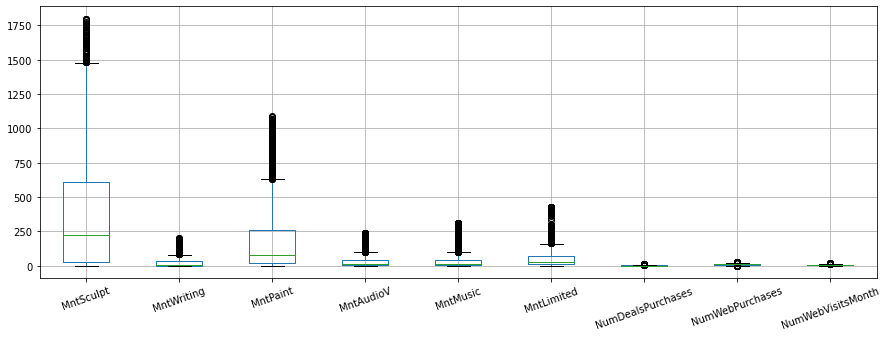

In [45]:
boxplot = DataOutliers.boxplot(column=['MntSculpt','MntWriting','MntPaint','MntAudioV','MntMusic','MntLimited','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth'], rot=20,fontsize=10, figsize=(15,5))

In [46]:
DataOutliers.quantile(q=0.997, axis=0)

Income                 153365.6256
MntSculpt                1740.0150
MntWriting                192.0030
MntPaint                 1047.0030
MntAudioV                 231.0000
MntMusic                  312.3000
MntLimited                418.4000
NumDealsPurchases          11.0030
NumWebPurchases            28.0030
NumCatalogPurchases        13.0000
NumStorePurchases          13.0000
NumWebVisitsMonth          15.0000
Name: 0.997, dtype: float64

#### <font color='#f0690a'>Z-Score</font> <a class="anchor" id="second-bullet"></a>


In [47]:
# UpColours07_Num (DATA TYPE - int and floats)

import scipy.stats as stats
from scipy.stats import zscore
#UpColours07_Num_zscore = UpColours07_Num.apply(stats.zscore)
#UpColours07_Num_zscore

In [48]:
# To see the rows(indexs) with outliers of a specific variable: UpColours07_Num_zscore[UpColours07_Num_zscore.Income>3]
#Count the number of outliers per variable

#UpColours07_Num_zscore[UpColours07_Num_zscore>3].count()

In [49]:
#UpColours07_Num_zscore[UpColours07_Num_zscore<-3].count()

In [50]:
#See a data frame with the numbers >3 and <-3 that are the ones that are considered outliers

#UpColours07_Num_zscore[(UpColours07_Num_zscore>3)|(UpColours07_Num_zscore<-3)]

In [51]:
# Used the UpColours07_Num_zscore because if we had used the UpColours07_Num which is not normalized, the visualization of the
#boxplots side by side would be irrelevant because there are different distances within the data
#boxplot = UpColours07_Num_zscore.boxplot(column=['Income','MntSculpt','MntWriting','MntPaint','MntAudioV','MntMusic','MntLimited','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth'], rot=20,fontsize=10, figsize=(15,5))

In [52]:
#Should't remove more than 3% of the observations as outliers, which is 150 observations

print(5000 * 0.03)

150.0


In [53]:
#UpColours07_Num_zscore[(UpColours07_Num_zscore>5)].count().sum()

In [54]:
#UpColours07_Num_zscore[(UpColours07_Num_zscore>4)].count().sum()

In [55]:
#Droped the ID colum because in the next step, when we join both categorical and numerical data, would be repeated
#del UpColours07_Num['ID']

In [56]:
#index = np.all(UpColours07_Num_zscore < 4.5, axis=1)
#UpColours07_OutliersOut = pd.concat([UpColours07_Cat.loc[index], UpColours07_Num.loc[index]], axis=1)
#UpColours07_OutliersOut

In [57]:
# Changed the data types of some variables from float64 to int64 (original form)
#UpColours07_OutliersOut.dtypes
#UpColours07_ = UpColours07_OutliersOut.astype({"Kidhome":'int64',"Teenhome":'int64',"Recency":'int64',"NumDealsPurchases":'int64',"NumWebPurchases":'int64',"NumCatalogPurchases":'int64',"NumStorePurchases":'int64',"NumWebVisitsMonth":'int64',"AcceptedCmp1":'int64',"AcceptedCmp2":'int64',"AcceptedCmp3":'int64',"AcceptedCmp4":'int64',"AcceptedCmp5":'int64',"Complain":'int64'})

In [58]:
#Checked to see if its the same original data types
#UpColours07_.dtypes

In [59]:
UpColours07_No_Outliers.set_index('ID', inplace=True)
UpColours07_No_Outliers

,Education,Marital_Status,Dt_Customer_Year,YearsInCompany,Income,Kidhome,Teenhome,Recency,MntSculpt,MntWriting,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Customer_Age
ID,,,,,,,,,,,,,,,,,,,,,
70003082,PhD,Single,2019,2,113023.0,0.0,0.0,6.0,1014.0,15.0,...,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
70003084,PhD,Single,2018,3,93571.0,0.0,1.0,10.0,639.0,88.0,...,5.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
70003085,PhD,Single,2018,3,91852.0,0.0,1.0,26.0,806.0,56.0,...,9.0,11.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0
70003087,PhD,Married,2017,4,69485.0,1.0,1.0,73.0,293.0,24.0,...,4.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
70003089,PhD,Single,2018,3,109499.0,0.0,0.0,75.0,639.0,126.0,...,7.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70013075,Graduation,Single,2018,3,58121.0,1.0,1.0,6.0,39.0,3.0,...,2.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0
70013077,Graduation,Married,2019,2,125962.0,0.0,1.0,75.0,1221.0,33.0,...,7.0,5.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,36.0
70013078,PhD,Married,2019,2,99628.0,0.0,0.0,98.0,810.0,0.0,...,7.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0


### <font color='#f0690a'>Feature Engineering</font> <a class="anchor" id="second-bullet"></a>

In [60]:
#To check coherence
UpColours07_ = UpColours07_No_Outliers.copy()
UpColours07_.describe()

,Dt_Customer_Year,YearsInCompany,Income,Kidhome,Teenhome,Recency,MntSculpt,MntWriting,MntPaint,MntAudioV,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Customer_Age
count,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,...,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000
mean,2018.052556,2.947444,69139.933038,0.445796,0.509481,49.117065,360.563871,24.871785,176.583042,31.336232,...,4.550907,5.784419,5.247939,0.080173,0.067189,0.074608,0.063685,0.014015,0.011748,47.251031
std,0.692987,0.692987,27991.657847,0.543841,0.547584,29.013988,393.505960,36.493114,225.143963,45.691292,...,2.757439,3.252784,2.426777,0.271589,0.250374,0.262786,0.244216,0.117564,0.107760,11.765245
min,2017.000000,2.000000,2286.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,2018.000000,2.000000,47543.500000,0.000000,0.000000,24.000000,29.000000,2.000000,18.000000,3.000000,...,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000
50%,2018.000000,3.000000,68979.000000,0.000000,0.000000,49.000000,214.000000,8.000000,73.000000,10.000000,...,4.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
75%,2019.000000,3.000000,90721.750000,1.000000,1.000000,74.000000,598.000000,32.000000,251.000000,40.000000,...,6.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000
max,2019.000000,4.000000,157296.525000,2.000000,2.000000,99.000000,1745.000000,179.000000,998.000000,230.000000,...,13.000000,13.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000


In [61]:
UpColours07_.shape

(4852, 26)

In [62]:
#Create a new variable with the number of children at home and droped the other 2
UpColours07_['Childrenhome'] = UpColours07_['Kidhome']+UpColours07_['Teenhome']
UpColours07_.drop(labels=['Kidhome','Teenhome'],axis=1,inplace=True)

In [63]:
## Create new variable: Ratio between Total amount spent and Income in percentage
UpColours07_['TotalMntSpent'] = UpColours07_['MntPaint']+UpColours07_['MntSculpt']+UpColours07_['MntWriting']+UpColours07_['MntMusic']+UpColours07_['MntAudioV']
UpColours07_['R_Mnt_Income'] = (UpColours07_['TotalMntSpent'] / UpColours07_['Income'])*100
UpColours07_

,Education,Marital_Status,Dt_Customer_Year,YearsInCompany,Income,Recency,MntSculpt,MntWriting,MntPaint,MntAudioV,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Customer_Age,Childrenhome,TotalMntSpent,R_Mnt_Income
ID,,,,,,,,,,,,,,,,,,,,,
70003082,PhD,Single,2019,2,113023.0,6.0,1014.0,15.0,643.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,1782.0,1.576670
70003084,PhD,Single,2018,3,93571.0,10.0,639.0,88.0,185.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,39.0,1.0,1029.0,1.099700
70003085,PhD,Single,2018,3,91852.0,26.0,806.0,56.0,350.0,54.0,...,0.0,0.0,0.0,1.0,0.0,0.0,43.0,1.0,1320.0,1.437094
70003087,PhD,Married,2017,4,69485.0,73.0,293.0,24.0,49.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,42.0,2.0,403.0,0.579981
70003089,PhD,Single,2018,3,109499.0,75.0,639.0,126.0,539.0,152.0,...,0.0,0.0,1.0,0.0,0.0,0.0,33.0,0.0,1608.0,1.468507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70013075,Graduation,Single,2018,3,58121.0,6.0,39.0,3.0,19.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,58.0,2.0,70.0,0.120438
70013077,Graduation,Married,2019,2,125962.0,75.0,1221.0,33.0,459.0,100.0,...,0.0,1.0,1.0,0.0,0.0,0.0,36.0,1.0,1933.0,1.534590
70013078,PhD,Married,2019,2,99628.0,98.0,810.0,0.0,469.0,194.0,...,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,1498.0,1.503593


In [64]:
UpColours07_['Education'].replace(to_replace='Graduation', value='1st cycle', inplace=True)
UpColours07_['Education'].replace(to_replace='Master', value='2nd cycle', inplace=True)
UpColours07_['Education'].replace(to_replace='2n Cycle', value='2nd cycle', inplace=True)
UpColours07_['Education'].replace(to_replace='PhD', value='3rd cycle', inplace=True)
UpColours07_

,Education,Marital_Status,Dt_Customer_Year,YearsInCompany,Income,Recency,MntSculpt,MntWriting,MntPaint,MntAudioV,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Customer_Age,Childrenhome,TotalMntSpent,R_Mnt_Income
ID,,,,,,,,,,,,,,,,,,,,,
70003082,3rd cycle,Single,2019,2,113023.0,6.0,1014.0,15.0,643.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,1782.0,1.576670
70003084,3rd cycle,Single,2018,3,93571.0,10.0,639.0,88.0,185.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,39.0,1.0,1029.0,1.099700
70003085,3rd cycle,Single,2018,3,91852.0,26.0,806.0,56.0,350.0,54.0,...,0.0,0.0,0.0,1.0,0.0,0.0,43.0,1.0,1320.0,1.437094
70003087,3rd cycle,Married,2017,4,69485.0,73.0,293.0,24.0,49.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,42.0,2.0,403.0,0.579981
70003089,3rd cycle,Single,2018,3,109499.0,75.0,639.0,126.0,539.0,152.0,...,0.0,0.0,1.0,0.0,0.0,0.0,33.0,0.0,1608.0,1.468507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70013075,1st cycle,Single,2018,3,58121.0,6.0,39.0,3.0,19.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,58.0,2.0,70.0,0.120438
70013077,1st cycle,Married,2019,2,125962.0,75.0,1221.0,33.0,459.0,100.0,...,0.0,1.0,1.0,0.0,0.0,0.0,36.0,1.0,1933.0,1.534590
70013078,3rd cycle,Married,2019,2,99628.0,98.0,810.0,0.0,469.0,194.0,...,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,1498.0,1.503593


In [65]:
def one_hot_encode(data_frame, column_name):
    dummies = pd.get_dummies(data_frame[column_name],prefix=column_name, drop_first = True) 
    data_frame = pd.concat([data_frame,dummies],axis=1)
    data_frame.drop(labels=[column_name], axis=1, inplace=True)
    return data_frame

UpColours07_dummy = one_hot_encode(UpColours07_, "Education")
UpColours07_dummies = one_hot_encode(UpColours07_dummy,"Marital_Status")
UpColours07_dummies

,Dt_Customer_Year,YearsInCompany,Income,Recency,MntSculpt,MntWriting,MntPaint,MntAudioV,MntMusic,MntLimited,...,Complain,Customer_Age,Childrenhome,TotalMntSpent,R_Mnt_Income,Education_2nd cycle,Education_3rd cycle,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
ID,,,,,,,,,,,,,,,,,,,,,
70003082,2019,2,113023.0,6.0,1014.0,15.0,643.0,74.0,36.0,36.0,...,0.0,28.0,0.0,1782.0,1.576670,0,1,0,1,0
70003084,2018,3,93571.0,10.0,639.0,88.0,185.0,64.0,53.0,160.0,...,0.0,39.0,1.0,1029.0,1.099700,0,1,0,1,0
70003085,2018,3,91852.0,26.0,806.0,56.0,350.0,54.0,54.0,260.0,...,0.0,43.0,1.0,1320.0,1.437094,0,1,0,1,0
70003087,2017,4,69485.0,73.0,293.0,24.0,49.0,4.0,33.0,12.0,...,0.0,42.0,2.0,403.0,0.579981,0,1,1,0,0
70003089,2018,3,109499.0,75.0,639.0,126.0,539.0,152.0,152.0,152.0,...,0.0,33.0,0.0,1608.0,1.468507,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70013075,2018,3,58121.0,6.0,39.0,3.0,19.0,5.0,4.0,6.0,...,0.0,58.0,2.0,70.0,0.120438,0,0,0,1,0
70013077,2019,2,125962.0,75.0,1221.0,33.0,459.0,100.0,120.0,20.0,...,0.0,36.0,1.0,1933.0,1.534590,0,0,1,0,0
70013078,2019,2,99628.0,98.0,810.0,0.0,469.0,194.0,25.0,70.0,...,0.0,44.0,0.0,1498.0,1.503593,0,1,1,0,0


In [66]:
UpColours07_dummies[['MntPaint', 'MntSculpt', 'MntWriting', 'MntMusic', 'MntAudioV']].sum()

MntPaint       856780.92
MntSculpt     1749455.90
MntWriting     120677.90
MntMusic       161667.70
MntAudioV      152043.40
dtype: float64

In [67]:
# Create variables for the Total Amount Spent in each category

#TotalAmountSpent_Paint = UpColours07_dummies[['MntPaint']].sum()
#TotalAmountSpent_Sculpt = UpColours07_dummies[['MntSculpt']].sum()
#TotalAmountSpent_Writing = UpColours07_dummies[['MntWriting']].sum()
#TotalAmountSpent_Music = UpColours07_dummies[['MntMusic']].sum()
#TotalAmountSpent_AudioV = UpColours07_dummies[['MntAudioV']].sum()

In [68]:
#Ratio amount spent per category

#UpColours07_dummies['Ratio_MntPaint'] = UpColours07_dummies[['MntPaint']] / UpColours07_dummies['TotalMntSpent']
#UpColours07_dummies['Ratio_MntSculpt'] = UpColours07_dummies[['MntSculpt']] / UpColours07_dummies['TotalMntSpent']
#UpColours07_dummies['Ratio_MntWriting'] = UpColours07_dummies[['MntWriting']] / UpColours07_dummies['TotalMntSpent']
#UpColours07_dummies['Ratio_MntMusic'] = UpColours07_dummies[['MntMusic']] / UpColours07_dummies['TotalMntSpent']
#UpColours07_dummies['Ratio_MntAudioV'] = UpColours07_dummies[['MntAudioV']] / UpColours07_dummies['TotalMntSpent']

In [69]:
UpColours07_dummies['Ratio_MntLimited'] = (UpColours07_dummies['MntLimited'] / UpColours07_dummies['TotalMntSpent'])*100

In [70]:
UpColours07_dummies[['Customer_Age', 'Income', 'TotalMntSpent','R_Mnt_Income','MntLimited','Ratio_MntLimited']].describe()

,Customer_Age,Income,TotalMntSpent,R_Mnt_Income,MntLimited,Ratio_MntLimited
count,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000
mean,47.251031,69139.933038,626.674736,0.748266,53.941570,19.647476
std,11.765245,27991.657847,631.417008,0.646795,65.298269,90.122478
min,20.000000,2286.000000,1.300000,0.004247,0.000000,0.000000
25%,39.000000,47543.500000,69.000000,0.168636,11.000000,4.139269
50%,46.000000,68979.000000,399.000000,0.608617,30.000000,10.000000
75%,57.000000,90721.750000,1056.700000,1.211407,70.000000,22.307908
max,75.000000,157296.525000,2995.000000,10.013432,422.900000,5505.263158


In [71]:
UpColours07_corr = UpColours07_dummies[['Income','MntPaint','MntSculpt','MntMusic','MntWriting','MntAudioV','TotalMntSpent','MntLimited']].corr()
UpColours07_corr

,Income,MntPaint,MntSculpt,MntMusic,MntWriting,MntAudioV,TotalMntSpent,MntLimited
Income,1.000000,0.696883,0.693052,0.505696,0.512727,0.513380,0.788077,0.339863
MntPaint,0.696883,1.000000,0.612429,0.519592,0.583623,0.586649,0.856437,0.317287
MntSculpt,0.693052,0.612429,1.000000,0.332944,0.404769,0.386542,0.919870,0.312497
MntMusic,0.505696,0.519592,0.332944,1.000000,0.508082,0.494224,0.538750,0.425673
MntWriting,0.512727,0.583623,0.404769,0.508082,1.000000,0.569947,0.600479,0.311779
MntAudioV,0.513380,0.586649,0.386542,0.494224,0.569947,1.000000,0.595343,0.304892
TotalMntSpent,0.788077,0.856437,0.919870,0.538750,0.600479,0.595343,1.000000,0.382387
MntLimited,0.339863,0.317287,0.312497,0.425673,0.311779,0.304892,0.382387,1.000000


<AxesSubplot:xlabel='Income', ylabel='MntPaint'>

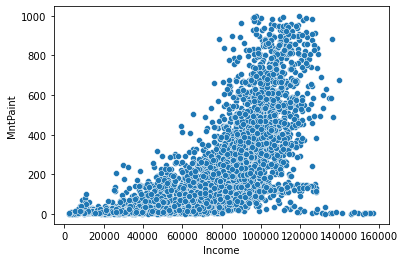

In [72]:
sns.scatterplot(x = 'Income', y = 'MntPaint', data = UpColours07_dummies)

<AxesSubplot:xlabel='Income', ylabel='MntSculpt'>

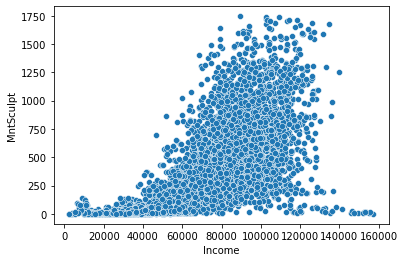

In [73]:
sns.scatterplot(x = 'Income', y = 'MntSculpt', data = UpColours07_dummies)

<AxesSubplot:xlabel='Income', ylabel='TotalMntSpent'>

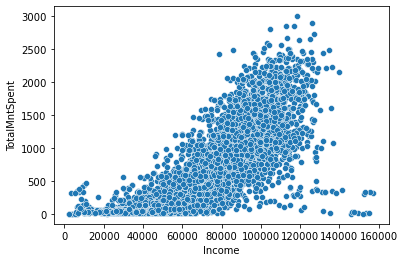

In [74]:
sns.scatterplot(x = 'Income', y = 'TotalMntSpent', data = UpColours07_dummies)

<AxesSubplot:xlabel='Customer_Age', ylabel='Income'>

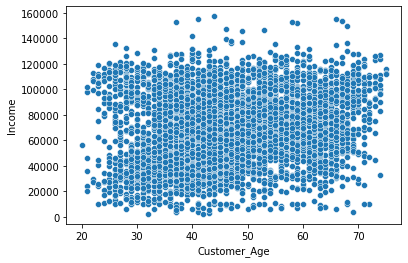

In [75]:
sns.scatterplot(x = 'Customer_Age', y = 'Income', data = UpColours07_dummies)

In [76]:
UpColours07_corr_channels = UpColours07_dummies[['Income','MntLimited','NumWebPurchases','NumStorePurchases','NumCatalogPurchases']].corr()
UpColours07_corr_channels

,Income,MntLimited,NumWebPurchases,NumStorePurchases,NumCatalogPurchases
Income,1.000000,0.339863,0.430395,0.631003,0.689167
MntLimited,0.339863,1.000000,0.460000,0.285945,0.334844
NumWebPurchases,0.430395,0.460000,1.000000,0.447641,0.370250
NumStorePurchases,0.631003,0.285945,0.447641,1.000000,0.573272
NumCatalogPurchases,0.689167,0.334844,0.370250,0.573272,1.000000


<AxesSubplot:xlabel='NumWebPurchases', ylabel='TotalMntSpent'>

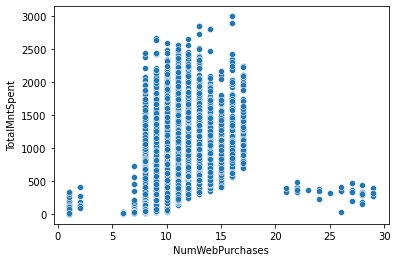

In [77]:
sns.scatterplot(x = 'NumWebPurchases', y = 'TotalMntSpent', data = UpColours07_dummies)

<AxesSubplot:xlabel='NumStorePurchases', ylabel='TotalMntSpent'>

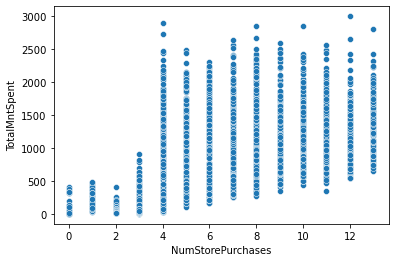

In [78]:
sns.scatterplot(x = 'NumStorePurchases', y = 'TotalMntSpent', data = UpColours07_dummies)

<AxesSubplot:xlabel='NumCatalogPurchases', ylabel='TotalMntSpent'>

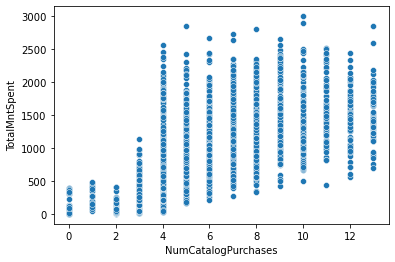

In [79]:
sns.scatterplot(x = 'NumCatalogPurchases', y = 'TotalMntSpent', data = UpColours07_dummies)

# <font color='#000086'>3. Clusters segmentation</font> <a class="anchor" id="second-bullet"></a>

### <font color='#f0690a'>1 - Product Usage Segmentation</font> <a class="anchor" id="second-bullet"></a>

### KMeans

In [80]:
from sklearn.preprocessing import MinMaxScaler #to scale the data
from sklearn.cluster import KMeans #to implement KMeans

In [81]:
#prod_usage = UpColours07_dummies[['Ratio_MntPaint', 'Ratio_MntSculpt', 'Ratio_MntWriting', 'Ratio_MntMusic', 'Ratio_MntAudioV']].copy()
prod_usage = UpColours07_dummies[['MntPaint', 'MntSculpt', 'MntWriting', 'MntMusic', 'MntAudioV']].copy()


In [82]:
#SCALING THE DATA for the Product Usage Segmentation

#instance with the formulas to scale the data
minmaxscaler_prod_usage = MinMaxScaler()

#fit the scaler to our dataset #contains the min and maw values of each variable
scale_prod_usage = minmaxscaler_prod_usage.fit(prod_usage).transform(prod_usage)

#method to apply MinMaxScaler to the segmented dataset and convert the array to a DataFrame with the names of the columns
minmax_ProductUsage = pd.DataFrame(scale_prod_usage, columns=prod_usage.columns)

In [83]:
#SCALED DATA MODEL to apply KMeans

inertias=[]

for k in range(1,6):
    model_scaled=KMeans(n_clusters=k)
    model_scaled.fit(minmax_ProductUsage)
    inertias.append(model_scaled.inertia_)
    
#plt.plot(range(1,6),inertias)
#plt.xlabel('Number of Clusters')
#plt.ylabel('Inertia')
#plt.xticks(range(1,6))
#plt.show()

In [84]:
#Cluster model with the SCALED DATA
model_prod_scaled = KMeans(n_clusters=3)
model_prod_scaled.fit(minmax_ProductUsage)
minmax_ProductUsage['ClusterProdUsage'] = model_prod_scaled.labels_
#minmax_ProductUsage

In [85]:
#To group the customers into account behaviour of the product usage ## the ones that spend more and the ones that spend less
#Cluster0 = minmax_ProductUsage[minmax_ProductUsage.ClusterProdUsage==0]
#Cluster1 = minmax_ProductUsage[minmax_ProductUsage.ClusterProdUsage==1]
#Cluster2 = minmax_ProductUsage[minmax_ProductUsage.ClusterProdUsage==2]

#Clusters_scaled.mean()

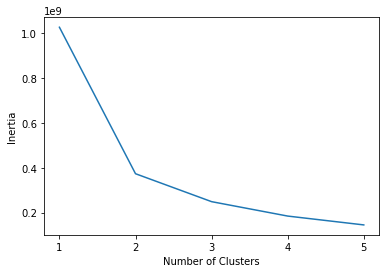

<Figure size 360x216 with 0 Axes>

In [86]:
#NON-SCALED DATA MODEL

#product_usage = UpColours07_dummies[['Ratio_MntPaint', 'Ratio_MntSculpt', 'Ratio_MntWriting', 'Ratio_MntMusic', 'Ratio_MntAudioV']].copy()
product_usage = UpColours07_dummies[['MntPaint', 'MntSculpt', 'MntWriting', 'MntMusic', 'MntAudioV']].copy()

inertias=[] #sum of squared errors (SSE)
for k in range(1,6):
    model_nonscaled = KMeans(n_clusters=k)
    model_nonscaled.fit(product_usage)
    inertias.append(model_nonscaled.inertia_)
    
plt.plot(range(1,6),inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,6))
plt.figure(figsize=(5,3))
plt.show()

In [87]:
#Cluster model with the NON-SCALED DATA for clusters=3
model_prod = KMeans(n_clusters=3)
model_prod.fit(product_usage)
product_usage['ClusterProdUsage'] = model_prod.labels_

product_usage

,MntPaint,MntSculpt,MntWriting,MntMusic,MntAudioV,ClusterProdUsage
ID,,,,,,
70003082,643.0,1014.0,15.0,36.0,74.0,1
70003084,185.0,639.0,88.0,53.0,64.0,0
70003085,350.0,806.0,56.0,54.0,54.0,0
70003087,49.0,293.0,24.0,33.0,4.0,2
70003089,539.0,639.0,126.0,152.0,152.0,0
...,...,...,...,...,...,...
70013075,19.0,39.0,3.0,4.0,5.0,2
70013077,459.0,1221.0,33.0,120.0,100.0,1
70013078,469.0,810.0,0.0,25.0,194.0,1


In [88]:
print((792/4852)*100)
print((2736/4852)*100)
print((1381/4852)*100)

16.323165704863975
56.38911788953009
28.462489694971143


In [89]:
clusters = product_usage.groupby(['ClusterProdUsage']).describe().transpose()
clusters

ClusterProdUsage            0            1            2
MntPaint   count  1343.000000   759.000000  2750.000000
           mean    309.889203   425.482213    42.784989
           std     227.782869   252.181080    53.758445
           min      16.000000    22.000000     0.000000
           25%     130.000000   213.000000    10.000000
           50%     245.000000   389.000000    21.000000
           75%     445.500000   605.500000    54.000000
           max     998.000000   997.000000   436.000000
MntSculpt  count  1343.000000   759.000000  2750.000000
           mean    516.693969  1092.023715    82.432691
           std     162.387733   229.623219    93.917416
           min     120.000000   705.000000     0.000000
           25%     393.500000   908.000000    14.000000
           50%     506.000000  1054.000000    39.000000
           75%     645.000000  1238.500000   127.500000
           max     867.000000  1745.000000   389.000000
MntWriting count  1343.000000   759.000000  2750.000000
           mean     43.472822    48.418972     9.288691
           std      43.265313    43.998482    18.368701
           min       0.000000     0.000000     0.000000
           25%      10.000000    14.000000     1.000000
           50%      28.000000    34.000000     3.000000
           75%      65.000000    74.000000     9.000000
           max     179.000000   178.000000   164.000000
MntMusic   count  1343.000000   759.000000  2750.000000
           mean     56.011914    59.997365    14.874800
           std      56.572980    58.065267    36.319828
           min       0.000000     0.000000     0.000000
           25%      11.000000    16.000000     2.000000
           50%      35.000000    41.000000     4.000000
           75%      82.500000    92.000000    12.000000
           max     239.000000   238.000000   312.300000
MntAudioV  count  1343.000000   759.000000  2750.000000
           mean     56.896500    57.282213    11.692436
           std      55.358034    53.511074    22.525249
           min       0.000000     0.000000     0.000000
           25%      12.000000    16.000000     2.000000
           50%      36.000000    40.000000     4.000000
           75%      86.000000    86.000000    11.000000
           max     230.000000   228.000000   215.000000

In [90]:
product_usage.groupby(['ClusterProdUsage']).mean().transpose()

ClusterProdUsage,0,1,2
MntPaint,309.889203,425.482213,42.784989
MntSculpt,516.693969,1092.023715,82.432691
MntWriting,43.472822,48.418972,9.288691
MntMusic,56.011914,59.997365,14.874800
MntAudioV,56.896500,57.282213,11.692436


In [91]:
#To group the customers into account behaviour of the product usage ## the ones that spend more and the ones that spend less
Cluster0 = product_usage[product_usage.ClusterProdUsage==0]
Cluster1 = product_usage[product_usage.ClusterProdUsage==1]
Cluster2 = product_usage[product_usage.ClusterProdUsage==2]

clusters.mean()

ClusterProdUsage
0    340.570783
1    376.239590
2    399.144081
dtype: float64

C:\Users\joana\SoftwareAnaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


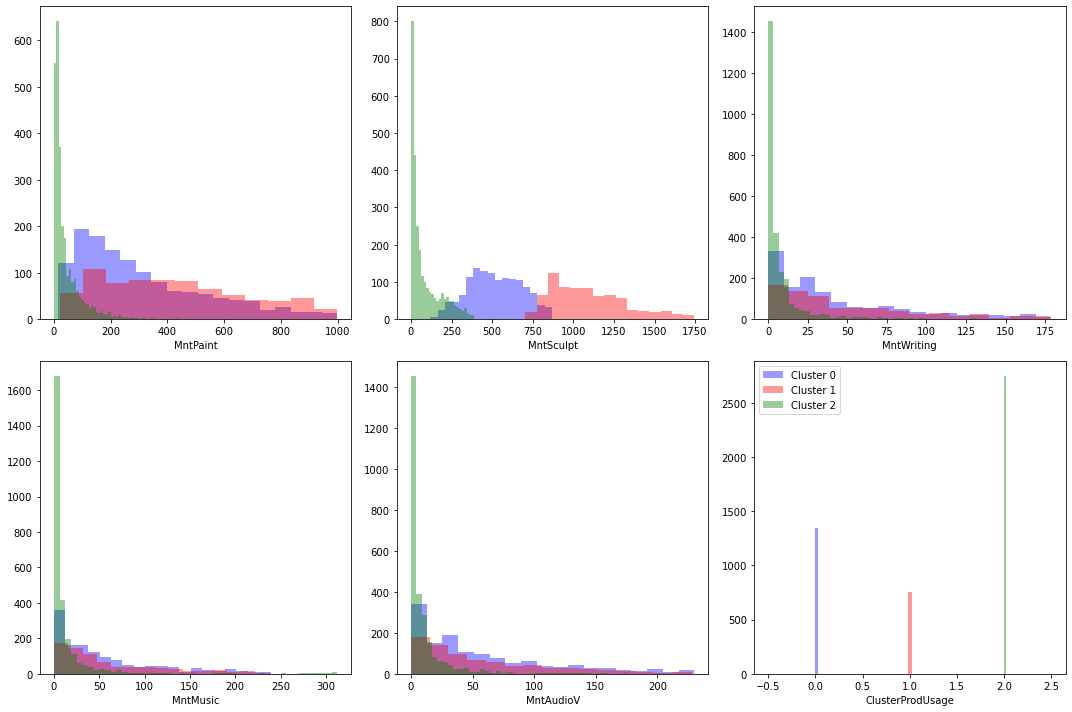

In [92]:
fig, axis = plt.subplots(2,3, figsize=(15, 10), sharex=False)
for i, column in enumerate(product_usage.columns):
    sns.distplot(Cluster0[column],color='blue',label='Cluster 0', kde = False,ax=axis[i//3,i%3])
    sns.distplot(Cluster1[column],color='red',label='Cluster 1', kde = False, ax=axis[i//3,i%3])
    sns.distplot(Cluster2[column],color='green',label='Cluster 2', kde = False, ax=axis[i//3,i%3])
plt.tight_layout()
plt.legend()

In [93]:
centroids = model_nonscaled.cluster_centers_
centroids

array([[ 168.80274779,  358.81648675,   32.18842002,   39.78900883,
          41.6498528 ],
       [ 212.04786054,  798.0459588 ,   35.73217116,   44.20126783,
          41.45388273],
       [ 659.44772727,  567.04090909,   65.71590909,   86.41590909,
          88.07      ],
       [ 465.7872549 , 1248.32352941,   48.63970588,   62.80882353,
          58.83088235],
       [  30.06394223,   51.58916737,    7.03946474,   12.56699235,
           8.78971963]])

In [94]:
centroid_0_MntPaint = centroids[0,0]
centroid_1_MntPaint = centroids[1,0]
centroid_2_MntPaint = centroids[2,0]

centroid_0_MntSculpt = centroids[0,1]
centroid_1_MntSculpt = centroids[1,1]
centroid_2_MntSculpt = centroids[2,1]

centroid_0_MntMusic = centroids[0,2]
centroid_1_MntMusic = centroids[1,2]
centroid_2_MntMusic = centroids[2,2]

centroid_0_MntWriting = centroids[0,3]
centroid_1_MntWriting = centroids[1,3]
centroid_2_MntWriting = centroids[2,3]

centroid_0_MntAudioV = centroids[0,4]
centroid_1_MntAudioV = centroids[1,4]
centroid_2_MntAudioV = centroids[2,4]

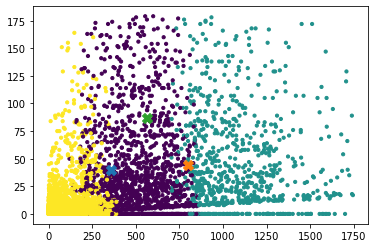

In [95]:
plt.scatter(product_usage.MntSculpt, product_usage.MntWriting, c=product_usage.ClusterProdUsage, s=10)
plt.scatter(centroid_0_MntSculpt, centroid_0_MntWriting, marker='X', s=100)
plt.scatter(centroid_1_MntSculpt, centroid_1_MntWriting, marker='X', s=100)
plt.scatter(centroid_2_MntSculpt, centroid_2_MntWriting, marker='X', s=100)
plt.show()

### DBSCAN

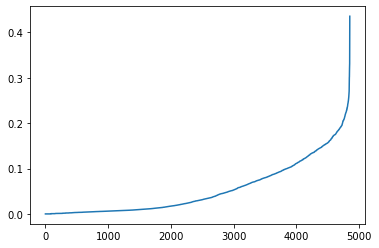

In [96]:
# The idea is to calculate, the average of the distances of every point to its k nearest neighbors. 
# The value of k will be specified by the user and corresponds to MinPts. 
# Next, these k-distances are plotted in an ascending order. 
# The aim is to determine the “knee”, which corresponds to the optimal eps parameter.

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(minmax_ProductUsage)
distances, indices = nbrs.kneighbors(minmax_ProductUsage)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [97]:
from sklearn.cluster import DBSCAN
#setting eps implicitly controls how many clusters will be found
#eps: defines the radius of neighborhood around an observation
#min_samples: minimum number of neighbors within “eps” radius

dbscan = DBSCAN(eps=0.25, min_samples = 10)  
dbscan_clusters = dbscan.fit_predict(minmax_ProductUsage)
dbscan_clusters
n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise = list(dbscan_clusters).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

Estimated number of clusters: 3
Estimated number of noise points: 167


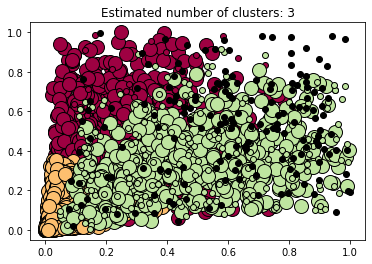

In [98]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = scale_prod_usage[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = scale_prod_usage[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

### SOM

- SOM is a type of Artificial Neural Network able to convert complex, nonlinear statistical relationships between high-dimensional data items into simple geometric relationships on a low-dimensional display. Minisom is designed to allow researchers to easily build on top of it and to give students the ability to quickly grasp its details.

In [99]:
pip install minisom

Processing c:\users\joana\appdata\local\pip\cache\wheels\0e\26\1a\6859e03682075865e482f052bf299f5de86d27fd9891dc2717\minisom-2.2.7-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [100]:
import pandas as pd
import numpy as np
from minisom import MiniSom 

In [101]:
data_productusage = UpColours07_dummies[['MntPaint', 'MntSculpt', 'MntWriting', 'MntMusic', 'MntAudioV']].copy()

In [102]:
# used as functions to convert python numbers to array scalars, python sequences of numbers to arrays of that type, or as arguments to the dtype keyword that many numpy functions or methods accept
ProductUsage_np = np.float32(data_productusage.values)

In [103]:
minmaxscaler = MinMaxScaler()
Scaled_ProductUsage = minmaxscaler.fit(ProductUsage_np).transform(ProductUsage_np)

minmax_ProductUsage_SOM = pd.DataFrame(Scaled_ProductUsage, columns=data_productusage.columns)
minmax_ProductUsage_SOM

,MntPaint,MntSculpt,MntWriting,MntMusic,MntAudioV
0,0.644289,0.581089,0.083799,0.115274,0.321739
1,0.185371,0.366189,0.491620,0.169709,0.278261
2,0.350701,0.461891,0.312849,0.172911,0.234783
3,0.049098,0.167908,0.134078,0.105668,0.017391
4,0.540080,0.366189,0.703911,0.486712,0.660870
...,...,...,...,...,...
4847,0.019038,0.022350,0.016760,0.012808,0.021739
4848,0.459920,0.699713,0.184358,0.384246,0.434783
4849,0.469940,0.464183,0.000000,0.080051,0.843478
4850,0.401804,0.445845,0.122905,0.051233,0.565217


In [104]:
#creata a SOM instance
ProductUsage_SOM = MiniSom(
            x = 20, 
            y = 20, 
            input_len = len(minmax_ProductUsage_SOM.columns), 
            learning_rate = 0.5,
            topology = "rectangular"  # or "hexagonal"   
            )

In [105]:
#initialize the weights to span the first two principal components #Scaled_ProductUsage because it'a an array, dataframe doesn't work
ProductUsage_SOM.pca_weights_init(Scaled_ProductUsage)

In [106]:
#train the model to the scaled date and define as parameter the nº of iterations
ProductUsage_SOM.train(data = Scaled_ProductUsage, num_iteration=100)

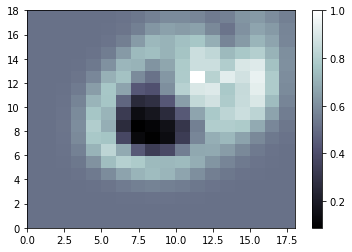

In [107]:
from pylab import plot,show,pcolor,colorbar
pcolor(ProductUsage_SOM.distance_map().T[1:-1,1:-1], cmap='bone')
colorbar()
show()

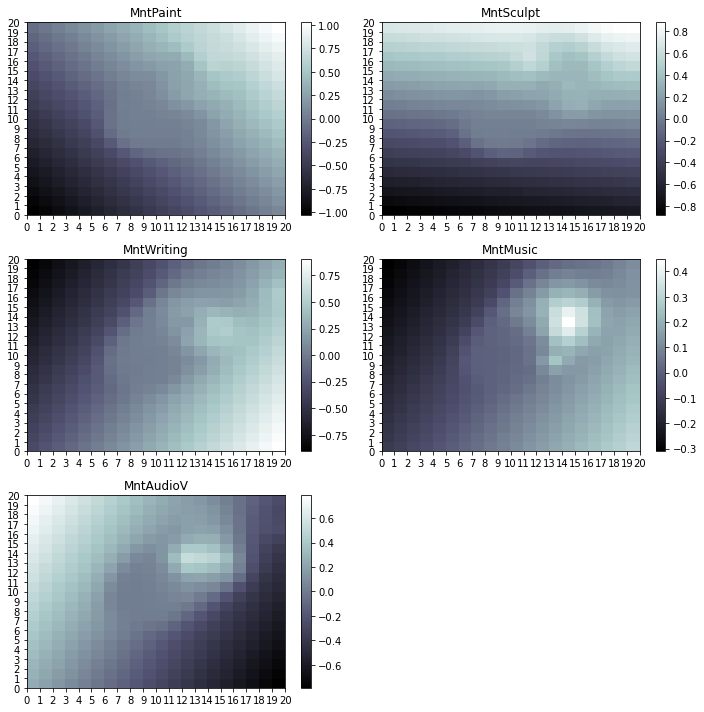

In [108]:
ProductlUsageW = ProductUsage_SOM.get_weights()

# Create a new figure
plt.figure(figsize=(10, 10))

# Add subplots to the current figure with all the component planes
for i, f in enumerate(minmax_ProductUsage_SOM.columns):
    plt.subplot(3, 2, i+1)  #subplot(nrows, ncols, index)
    plt.title(f)  #f - feature name for each graph
    plt.pcolor(ProductlUsageW[:,:,i].T, cmap='bone')
    plt.xticks(np.arange(20+1))
    plt.yticks(np.arange(20+1))
    colorbar()
    
# Fit plots within your figure cleanly
plt.tight_layout()
# Display the figure
plt.show()

### Hierarchical Clustering

In [109]:
ProductlUsageW = np.reshape(ProductlUsageW, (20*20, len(Scaled_ProductUsage[0])))

In [110]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [111]:
hierar_ProductUsage = linkage(ProductlUsageW, 'ward') 

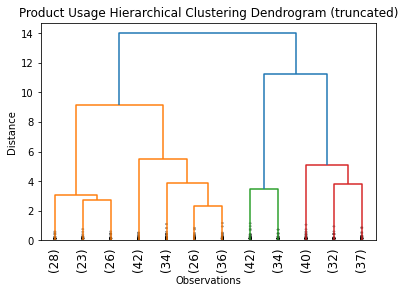

In [112]:
plt.title('Product Usage Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(
    hierar_ProductUsage,
    truncate_mode='lastp',  
    p=12,  
    show_leaf_counts=True,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, 
)

plt.show()

In [113]:
kmeans_ProductlUsage = KMeans(n_clusters = 2).fit(ProductlUsageW)

In [114]:
clusters_Product = kmeans_ProductlUsage.labels_
clusters_Product

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [115]:
clusters_Product = np.reshape(clusters_Product, (20,20))

In [116]:
ProductUsage_clusters = []

for observation in Scaled_ProductUsage:
    bmu = ProductUsage_SOM.winner(observation)
    x_coord = bmu[0]
    y_coord = bmu[1]

    ProductUsage_clusters.append(clusters_Product[x_coord,y_coord])
    
    
ProductUsage_clusters = pd.DataFrame(data=ProductUsage_clusters, columns=['Cluster'])
ProductUsage_clusters

,Cluster
0,1
1,1
2,1
3,1
4,1
...,...
4847,1
4848,1
4849,1
4850,1


### <font color='#f0690a'>2 - Customer Value Segmentation</font> <a class="anchor" id="second-bullet"></a>

### KMeans

In [117]:
#SCALING THE DATA

cust_value = UpColours07_dummies[['Income','R_Mnt_Income','TotalMntSpent','Customer_Age','Childrenhome']].copy()

#instance with the formulas to scale the data
minmaxscaler_cust_value = MinMaxScaler()

scale_cust_value = minmaxscaler_cust_value.fit(cust_value).transform(cust_value)

minmax_CustomerValue = pd.DataFrame(scale_cust_value,columns=cust_value.columns)
minmax_CustomerValue.head()

,Income,R_Mnt_Income,TotalMntSpent,Customer_Age,Childrenhome
0,0.714384,0.157098,0.594816,0.145455,0.00
1,0.588895,0.109445,0.343288,0.345455,0.25
2,0.577806,0.143153,0.440492,0.418182,0.25
3,0.433512,0.057521,0.134182,0.400000,0.50
4,0.691650,0.146292,0.536694,0.236364,0.00


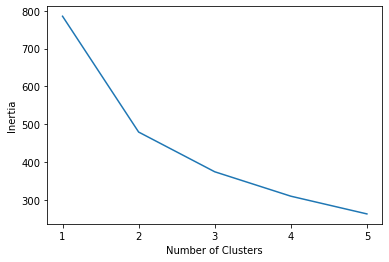

In [118]:
#Apply KMeans in the SCALED DATA MODEL

inertias=[]

for k in range(1,6):
    model_scale=KMeans(n_clusters=k)
    model_scale.fit(minmax_CustomerValue)
    inertias.append(model_scale.inertia_)
    
plt.plot(range(1,6),inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,6))
plt.show()

In [119]:
#Cluster model with the SCALED DATA
model_cust_scaled = KMeans(n_clusters=2)
model_cust_scaled.fit(minmax_CustomerValue)
minmax_CustomerValue['ClusterCustValue'] = model_cust_scaled.labels_

minmax_CustomerValue

,Income,R_Mnt_Income,TotalMntSpent,Customer_Age,Childrenhome,ClusterCustValue
0,0.714384,0.157098,0.594816,0.145455,0.00,1
1,0.588895,0.109445,0.343288,0.345455,0.25,1
2,0.577806,0.143153,0.440492,0.418182,0.25,1
3,0.433512,0.057521,0.134182,0.400000,0.50,0
4,0.691650,0.146292,0.536694,0.236364,0.00,1
...,...,...,...,...,...,...
4847,0.360201,0.011608,0.022948,0.690909,0.50,0
4848,0.797856,0.152894,0.645255,0.290909,0.25,1
4849,0.627970,0.149797,0.499950,0.436364,0.00,1
4850,0.701449,0.120796,0.449511,0.345455,0.25,1


In [120]:
print((2150/4909)*100)
print((2759/4909)*100)

43.797107353839884
56.202892646160116


In [121]:
Clusters_CustomerValue = minmax_CustomerValue.groupby(['ClusterCustValue']).describe().transpose()
Clusters_CustomerValue

ClusterCustValue               0            1
Income        count  2942.000000  1910.000000
              mean      0.319454     0.603544
              std       0.125990     0.097191
              min       0.000000     0.285019
              25%       0.230055     0.534836
              50%       0.318159     0.600633
              75%       0.410421     0.670822
              max       0.973455     1.000000
R_Mnt_Income  count  2942.000000  1910.000000
              mean      0.035823     0.133652
              std       0.043130     0.044038
              min       0.000000     0.000062
              25%       0.010566     0.102061
              50%       0.021574     0.133159
              75%       0.051715     0.163255
              max       1.000000     0.307672
TotalMntSpent count  2942.000000  1910.000000
              mean      0.066314     0.428519
              std       0.071439     0.159969
              min       0.000000     0.002038
              25%       0.014263     0.313224
              50%       0.030431     0.413101
              75%       0.101446     0.534606
              max       0.370678     1.000000
Customer_Age  count  2942.000000  1910.000000
              mean      0.469736     0.535117
              std       0.199301     0.229111
              min       0.000000     0.018182
              25%       0.327273     0.363636
              50%       0.436364     0.545455
              75%       0.618182     0.727273
              max       0.981818     1.000000
Childrenhome  count  2942.000000  1910.000000
              mean      0.316196     0.119634
              std       0.168292     0.147066
              min       0.000000     0.000000
              25%       0.250000     0.000000
              50%       0.250000     0.000000
              75%       0.500000     0.250000
              max       1.000000     0.750000

In [122]:
minmax_CustomerValue.groupby(['ClusterCustValue']).mean().transpose()

ClusterCustValue,0,1
Income,0.319454,0.603544
R_Mnt_Income,0.035823,0.133652
TotalMntSpent,0.066314,0.428519
Customer_Age,0.469736,0.535117
Childrenhome,0.316196,0.119634


In [123]:
#To group the customers into account behaviour of the customer value ## the ones that spend more and the ones that spend less
Cluster0_CustomerValue = minmax_CustomerValue[minmax_CustomerValue.ClusterCustValue==0]
Cluster1_CustomerValue = minmax_CustomerValue[minmax_CustomerValue.ClusterCustValue==1]
#Cluster2_CustomerValue = minmax_CustomerValue[minmax_CustomerValue.ClusterCustValue==2]

Clusters_CustomerValue.mean()

ClusterCustValue
0    367.992802
1    239.055322
dtype: float64

C:\Users\joana\SoftwareAnaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


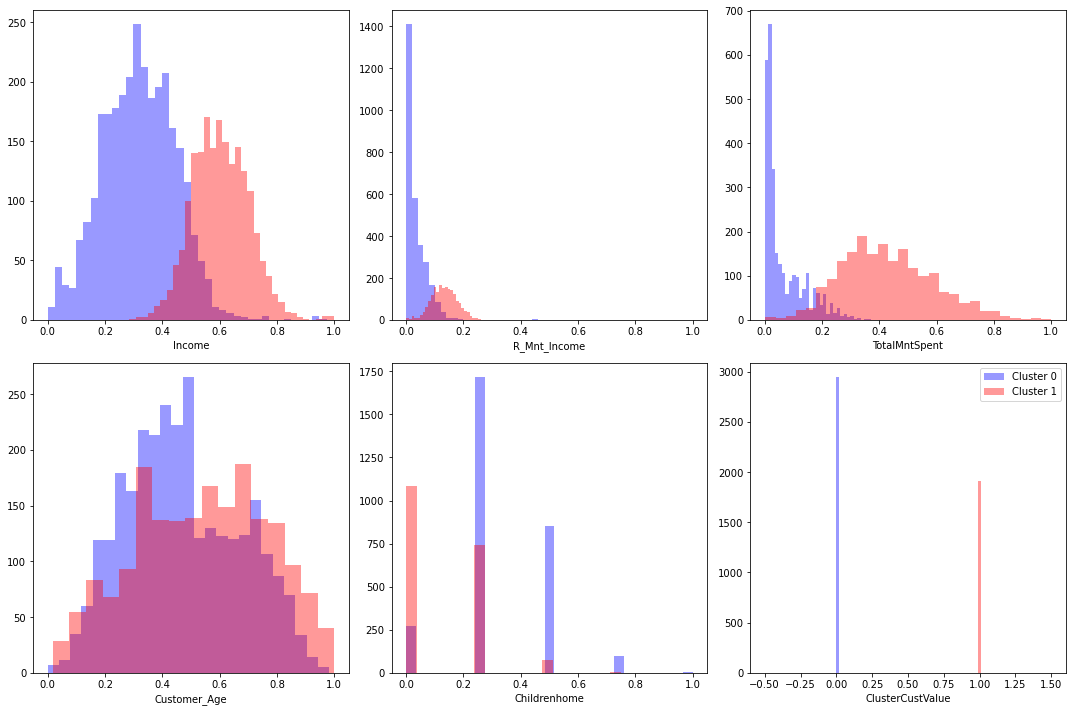

In [124]:
fig, axis = plt.subplots(2,3, figsize=(15,10), sharex=False)
for i, column in enumerate(minmax_CustomerValue.columns):
    sns.distplot(Cluster0_CustomerValue[column],color='blue',label='Cluster 0', kde = False,ax=axis[i//3,i%3])
    sns.distplot(Cluster1_CustomerValue[column],color='red',label='Cluster 1', kde = False, ax=axis[i//3,i%3])
    #sns.distplot(Cluster2_CustomerValue[column],color='green',label='Cluster 2', kde = False, ax=axis[i//3,i%3])
plt.tight_layout()
plt.legend()

In [125]:
centroids = model_cust_scaled.cluster_centers_
centroids

array([[0.31925521, 0.03583069, 0.06630485, 0.46941249, 0.3162415 ],
       [0.60355196, 0.13353807, 0.42815463, 0.53554583, 0.11976987]])

In [126]:
centroid_0_Income = centroids[0,0]
centroid_1_Income = centroids[1,0]
centroid_0_R_Mnt_Income = centroids[0,1]
centroid_1_R_Mnt_Income = centroids[1,1]
centroid_0_TotalMntSpent = centroids[0,2]
centroid_1_TotalMntSpent = centroids[1,2]
centroid_0_CustomerAge = centroids[0,3]
centroid_1_CustomerAge = centroids[1,3]
centroid_0_Childrenhome = centroids[0,4]
centroid_1_Childrenhome = centroids[1,4]

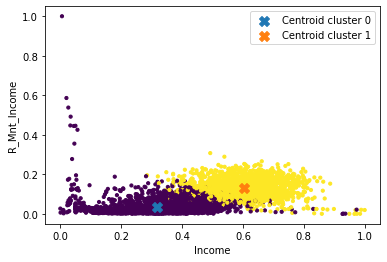

In [127]:
plt.scatter(minmax_CustomerValue.Income, minmax_CustomerValue.R_Mnt_Income, c=minmax_CustomerValue.ClusterCustValue, s=10)
plt.scatter(centroid_0_Income, centroid_0_R_Mnt_Income, marker='X', s=100, label ="Centroid cluster 0")
plt.scatter(centroid_1_Income, centroid_1_R_Mnt_Income, marker='X', s=100, label = "Centroid cluster 1")
plt.legend()
plt.xlabel('Income')
plt.ylabel('R_Mnt_Income')
plt.show()

In [128]:
#plt.scatter(minmax_CustomerValue.Income, minmax_CustomerValue.Customer_Age, c=minmax_CustomerValue.ClusterCustValue, s=10)
#plt.scatter(centroid_0_Income, centroid_0_CustomerAge, marker='X', s=100, label ="Centroid cluster 0")
#plt.scatter(centroid_1_Income, centroid_1_CustomerAge, marker='X', s=100, label = "Centroid cluster 1")
#plt.legend()
#plt.xlabel('Income')
#plt.ylabel('CustomerAge')
#plt.show()

In [129]:
#plt.scatter(minmax_CustomerValue.R_Mnt_Income, minmax_CustomerValue.Customer_Age, c=minmax_CustomerValue.ClusterCustValue, s=10)
#plt.scatter(centroid_0_R_Mnt_Income, centroid_0_CustomerAge, marker='X', s=100, label ="Centroid cluster 0")
#plt.scatter(centroid_1_R_Mnt_Income, centroid_1_CustomerAge, marker='X', s=100, label = "Centroid cluster 1")
#plt.legend()
#plt.xlabel('R_Mnt_Income')
#plt.ylabel('Customer_Age')
#plt.show()

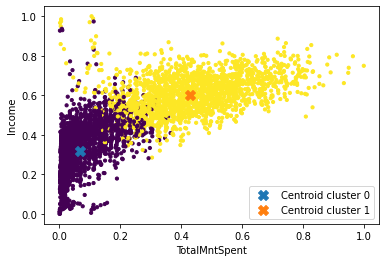

In [130]:
plt.scatter(minmax_CustomerValue.TotalMntSpent, minmax_CustomerValue.Income, c=minmax_CustomerValue.ClusterCustValue, s=10)
plt.scatter(centroid_0_TotalMntSpent, centroid_0_Income, marker='X', s=100, label ="Centroid cluster 0")
plt.scatter(centroid_1_TotalMntSpent, centroid_1_Income, marker='X', s=100, label = "Centroid cluster 1")
plt.legend()
plt.xlabel('TotalMntSpent')
plt.ylabel('Income')
plt.show()

In [131]:
#plt.scatter(minmax_CustomerValue.TotalMntSpent, minmax_CustomerValue.Customer_Age, c=minmax_CustomerValue.ClusterCustValue, s=10)
#plt.scatter(centroid_0_TotalMntSpent, centroid_0_CustomerAge, marker='X', s=100, label ="Centroid cluster 0")
#plt.scatter(centroid_1_TotalMntSpent, centroid_1_CustomerAge, marker='X', s=100, label = "Centroid cluster 1")
#plt.legend()
#plt.xlabel('TotalMntSpent')
#plt.ylabel('Customer_Age')
#plt.show()

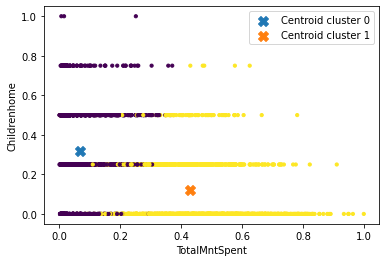

In [132]:
plt.scatter(minmax_CustomerValue.TotalMntSpent, minmax_CustomerValue.Childrenhome, c=minmax_CustomerValue.ClusterCustValue, s=10)
plt.scatter(centroid_0_TotalMntSpent, centroid_0_Childrenhome, marker='X', s=100, label ="Centroid cluster 0")
plt.scatter(centroid_1_TotalMntSpent, centroid_1_Childrenhome, marker='X', s=100, label = "Centroid cluster 1")
plt.legend()
plt.xlabel('TotalMntSpent')
plt.ylabel('Childrenhome')
plt.show()

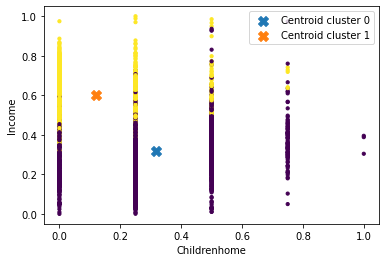

In [133]:
plt.scatter(minmax_CustomerValue.Childrenhome, minmax_CustomerValue.Income, c=minmax_CustomerValue.ClusterCustValue, s=10)
plt.scatter(centroid_0_Childrenhome, centroid_0_Income, marker='X', s=100, label ="Centroid cluster 0")
plt.scatter(centroid_1_Childrenhome, centroid_1_Income, marker='X', s=100, label = "Centroid cluster 1")
plt.legend()
plt.xlabel('Childrenhome')
plt.ylabel('Income')
plt.show()

In [134]:
#plt.scatter(minmax_CustomerValue.Childrenhome, minmax_CustomerValue.R_Mnt_Income, c=minmax_CustomerValue.ClusterCustValue, s=10)
#plt.scatter(centroid_0_Childrenhome, centroid_0_R_Mnt_Income, marker='X', s=100, label ="Centroid cluster 0")
#plt.scatter(centroid_1_Childrenhome, centroid_1_R_Mnt_Income, marker='X', s=100, label = "Centroid cluster 1")
#plt.legend()
#plt.xlabel('Childrenhome')
#plt.ylabel('R_Mnt_Income')
#plt.show()

In [135]:
#plt.scatter(minmax_CustomerValue.Childrenhome, minmax_CustomerValue.Customer_Age, c=minmax_CustomerValue.ClusterCustValue, s=10)
#plt.scatter(centroid_0_Childrenhome, centroid_0_CustomerAge, marker='X', s=100, label ="Centroid cluster 0")
#plt.scatter(centroid_1_Childrenhome, centroid_1_CustomerAge, marker='X', s=100, label = "Centroid cluster 1")
#plt.legend()
#plt.xlabel('Childrenhome')
#plt.ylabel('Customer_Age')
#plt.show()

### DBSCAN

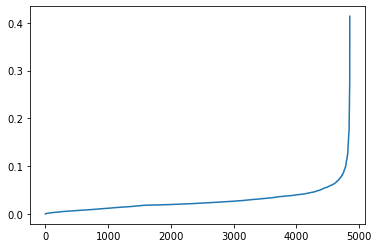

In [136]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(minmax_CustomerValue)
distances, indices = nbrs.kneighbors(minmax_CustomerValue)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [137]:
from sklearn.cluster import DBSCAN
#setting eps implicitly controls how many clusters will be found
#eps: 
#min_samples: minimun amount of neighboors that we need to be considered a cluster
dbscan = DBSCAN(eps=0.3, min_samples = 6)  
dbscan_clusters = dbscan.fit_predict(minmax_CustomerValue)
dbscan_clusters
n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise = list(dbscan_clusters).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

Estimated number of clusters: 2
Estimated number of noise points: 3


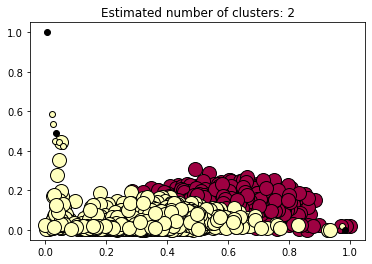

In [138]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = scale_cust_value[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = scale_cust_value[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

### SOM

In [139]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [140]:
import pandas as pd
import numpy as np
from minisom import MiniSom 

In [141]:
data_customervalue = UpColours07_dummies[['Income','R_Mnt_Income','TotalMntSpent','Customer_Age','Childrenhome']].copy()

In [142]:
# used as functions to convert python numbers to array scalars, python sequences of numbers to arrays of that type, or as arguments to the dtype keyword that many numpy functions or methods accept
CustomerValue_np = np.float32(data_customervalue.values)

In [143]:
minmaxscaler = MinMaxScaler()
Scaled_CustomerValue = minmaxscaler.fit(CustomerValue_np).transform(CustomerValue_np)

minmax_CustomerValue_SOM = pd.DataFrame(Scaled_CustomerValue, columns=data_customervalue.columns)
minmax_CustomerValue_SOM

,Income,R_Mnt_Income,TotalMntSpent,Customer_Age,Childrenhome
0,0.714384,0.157098,0.594816,0.145455,0.00
1,0.588895,0.109445,0.343288,0.345455,0.25
2,0.577806,0.143153,0.440492,0.418182,0.25
3,0.433512,0.057521,0.134182,0.400000,0.50
4,0.691650,0.146292,0.536694,0.236364,0.00
...,...,...,...,...,...
4847,0.360201,0.011608,0.022948,0.690909,0.50
4848,0.797855,0.152894,0.645255,0.290909,0.25
4849,0.627970,0.149797,0.499950,0.436364,0.00
4850,0.701449,0.120796,0.449511,0.345455,0.25


In [144]:
#creata a SOM instance
CustomerValue_SOM = MiniSom(
            x = 20, 
            y = 20, 
            input_len = len(minmax_CustomerValue_SOM.columns), 
            learning_rate = 0.5,
            topology = "rectangular"  # or "hexagonal"   
            )

In [145]:
#initialize the weights to span the first two principal components
CustomerValue_SOM.pca_weights_init(Scaled_CustomerValue)

In [146]:
#train the model to the scaled date and define as parameter the nº of iterations
CustomerValue_SOM.train(data = Scaled_CustomerValue, num_iteration=100)

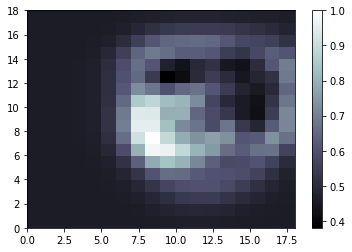

In [147]:
from pylab import plot,show,pcolor,colorbar
pcolor(CustomerValue_SOM.distance_map().T[1:-1,1:-1], cmap='bone')
colorbar()
show()

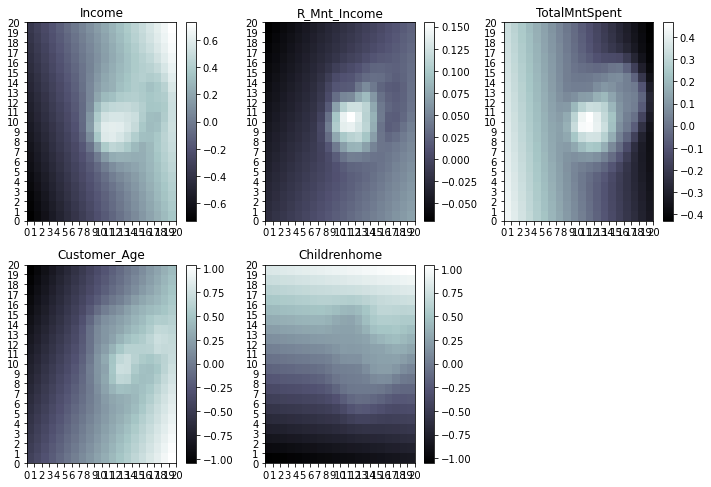

In [148]:
CustomerValueW = CustomerValue_SOM.get_weights()

# Create a new figure
plt.figure(figsize=(10, 10))  #.figsize=(width, height) in inches

# Add subplots to the current figure with all the component planes
for i, f in enumerate(minmax_CustomerValue_SOM.columns):
    plt.subplot(3, 3, i+1)  #.subplot(nrows, ncols, index)
    plt.title(f)  #.title(feature name) for each graph
    plt.pcolor(CustomerValueW[:,:,i].T, cmap='bone')
    plt.xticks(np.arange(20+1))
    plt.yticks(np.arange(20+1))
    colorbar()
    
# Fit plots within your figure cleanly
plt.tight_layout()
# Display the figure
plt.show()

### Hierarchical Clustering

In [149]:
CustomerValueW = np.reshape(CustomerValueW, (20*20, len(Scaled_CustomerValue[0])))

In [150]:
hierar_CustomerValue = linkage(CustomerValueW, 'ward') 

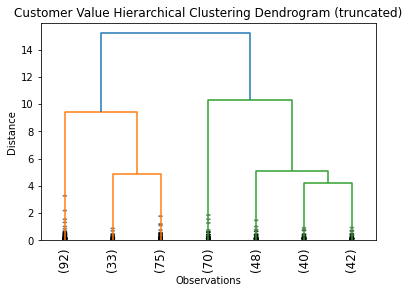

In [151]:
plt.title('Customer Value Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(
    hierar_CustomerValue,
    truncate_mode='lastp',  
    p=7,  
    show_leaf_counts=True,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, 
)

plt.show()

In [152]:
kmeans_CustomerValue = KMeans(n_clusters = 2).fit(CustomerValueW)

In [153]:
clusters_Customer = kmeans_CustomerValue.labels_
clusters_Customer

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [154]:
clusters_Customer = np.reshape(clusters_Customer, (20,20))

In [155]:
CustomerValue_clusters = []

for observation in Scaled_CustomerValue:
    bmu = CustomerValue_SOM.winner(observation)
    x_coord = bmu[0]
    y_coord = bmu[1]

    CustomerValue_clusters.append(clusters_Customer[x_coord,y_coord])
    
    
CustomerValue_clusters = pd.DataFrame(data=CustomerValue_clusters, columns=['Cluster'])
CustomerValue_clusters

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
4847,0
4848,0
4849,0
4850,0


### <font color='#f0690a'>3 - Channel Usage Segmentation</font> <a class="anchor" id="second-bullet"></a>

### KMeans

In [156]:
#SCALING THE DATA

Channel_Usage = UpColours07_dummies[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']].copy()

#instance with the formulas to scale the data
minmaxscaler_channel_usage = MinMaxScaler()

#fit the scaler to our dataset #contains the min and maw values of each variable
scale_channel_usage = minmaxscaler_channel_usage.fit(Channel_Usage).transform(Channel_Usage)

#method to apply MinMaxScaler to the segmented dataset and convert the array to a DataFrame with the names of the columns
minmax_ChannelUsage = pd.DataFrame(scale_channel_usage, columns=Channel_Usage.columns)
minmax_ChannelUsage.head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases
0,0.285714,0.307692,0.615385,0.076923
1,0.428571,0.384615,1.000000,0.230769
2,0.500000,0.692308,0.846154,0.076923
3,0.357143,0.307692,0.461538,0.538462
4,0.357143,0.538462,0.846154,0.076923


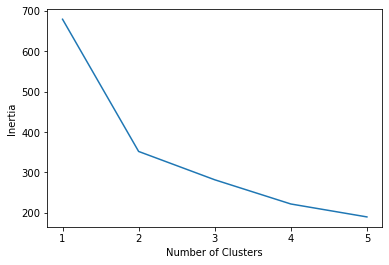

In [157]:
#SCALED DATA MODEL to apply KMeans

inertias=[]

for k in range(1,6):
    model_scale=KMeans(n_clusters=k)
    model_scale.fit(minmax_ChannelUsage)
    inertias.append(model_scale.inertia_)
    
plt.plot(range(1,6),inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,6))
plt.show()

In [158]:
#Cluster model with the SCALED DATA
model_channel_scaled = KMeans(n_clusters=3)
model_channel_scaled.fit(minmax_ChannelUsage)
minmax_ChannelUsage['ClusterChannelUsage'] = model_channel_scaled.labels_

minmax_ChannelUsage

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,ClusterChannelUsage
0,0.285714,0.307692,0.615385,0.076923,0
1,0.428571,0.384615,1.000000,0.230769,0
2,0.500000,0.692308,0.846154,0.076923,2
3,0.357143,0.307692,0.461538,0.538462,0
4,0.357143,0.538462,0.846154,0.076923,0
...,...,...,...,...,...
4847,0.285714,0.153846,0.230769,0.230769,1
4848,0.357143,0.538462,0.384615,0.076923,2
4849,0.357143,0.538462,0.923077,0.076923,0
4850,0.535714,0.461538,0.461538,0.076923,2


In [159]:
print((2582/4852)*100)
print((1453/4852)*100)
print((817/4852)*100)

53.2151690024732
29.94641384995878
16.838417147568013


In [160]:
Clusters_ChannelUsage = minmax_ChannelUsage.groupby(['ClusterChannelUsage']).describe().transpose()
Clusters_ChannelUsage

ClusterChannelUsage                  0            1           2
NumWebPurchases     count  1391.000000  2619.000000  842.000000
                    mean      0.396785     0.275282    0.368553
                    std       0.088255     0.104424    0.078751
                    min       0.214286     0.000000    0.214286
                    25%       0.321429     0.214286    0.321429
                    50%       0.392857     0.250000    0.357143
                    75%       0.464286     0.285714    0.428571
                    max       0.571429     1.000000    0.571429
NumCatalogPurchases count  1391.000000  2619.000000  842.000000
                    mean      0.400542     0.208095    0.708295
                    std       0.114623     0.079927    0.149829
                    min       0.230769     0.000000    0.461538
                    25%       0.307692     0.153846    0.615385
                    50%       0.384615     0.230769    0.692308
                    75%       0.461538     0.230769    0.846154
                    max       0.846154     0.615385    1.000000
NumStorePurchases   count  1391.000000  2619.000000  842.000000
                    mean      0.724824     0.260111    0.557555
                    std       0.164923     0.092796    0.201786
                    min       0.307692     0.000000    0.230769
                    25%       0.615385     0.230769    0.384615
                    50%       0.692308     0.230769    0.538462
                    75%       0.846154     0.307692    0.692308
                    max       1.000000     0.538462    1.000000
NumDealsPurchases   count  1391.000000  2619.000000  842.000000
                    mean      0.235304     0.166065    0.116938
                    std       0.186140     0.110312    0.102325
                    min       0.000000     0.000000    0.000000
                    25%       0.076923     0.076923    0.076923
                    50%       0.153846     0.153846    0.076923
                    75%       0.307692     0.230769    0.153846
                    max       1.000000     0.769231    0.769231

In [161]:
minmax_ChannelUsage.groupby(['ClusterChannelUsage']).mean().transpose()

ClusterChannelUsage,0,1,2
NumWebPurchases,0.396785,0.275282,0.368553
NumCatalogPurchases,0.400542,0.208095,0.708295
NumStorePurchases,0.724824,0.260111,0.557555
NumDealsPurchases,0.235304,0.166065,0.116938


In [162]:
print(UpColours07_dummies[['NumWebPurchases']].sum())
print(UpColours07_dummies[['NumCatalogPurchases']].sum())
print(UpColours07_dummies[['NumStorePurchases']].sum())
print(UpColours07_dummies[['NumDealsPurchases']].sum())

NumWebPurchases    49182.0
dtype: float64
NumCatalogPurchases    22081.0
dtype: float64
NumStorePurchases    28066.0
dtype: float64
NumDealsPurchases    11189.0
dtype: float64


In [163]:
#To group the customers into account behaviour of the channel usage ## the ones that spend more and the ones that spend less
Cluster0_ChannelUsage = minmax_ChannelUsage[minmax_ChannelUsage.ClusterChannelUsage==0]
Cluster1_ChannelUsage = minmax_ChannelUsage[minmax_ChannelUsage.ClusterChannelUsage==1]
Cluster2_ChannelUsage = minmax_ChannelUsage[minmax_ChannelUsage.ClusterChannelUsage==2]

Clusters_ChannelUsage.mean()

ClusterChannelUsage
0    174.234577
1    327.588008
2    105.616105
dtype: float64

C:\Users\joana\SoftwareAnaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


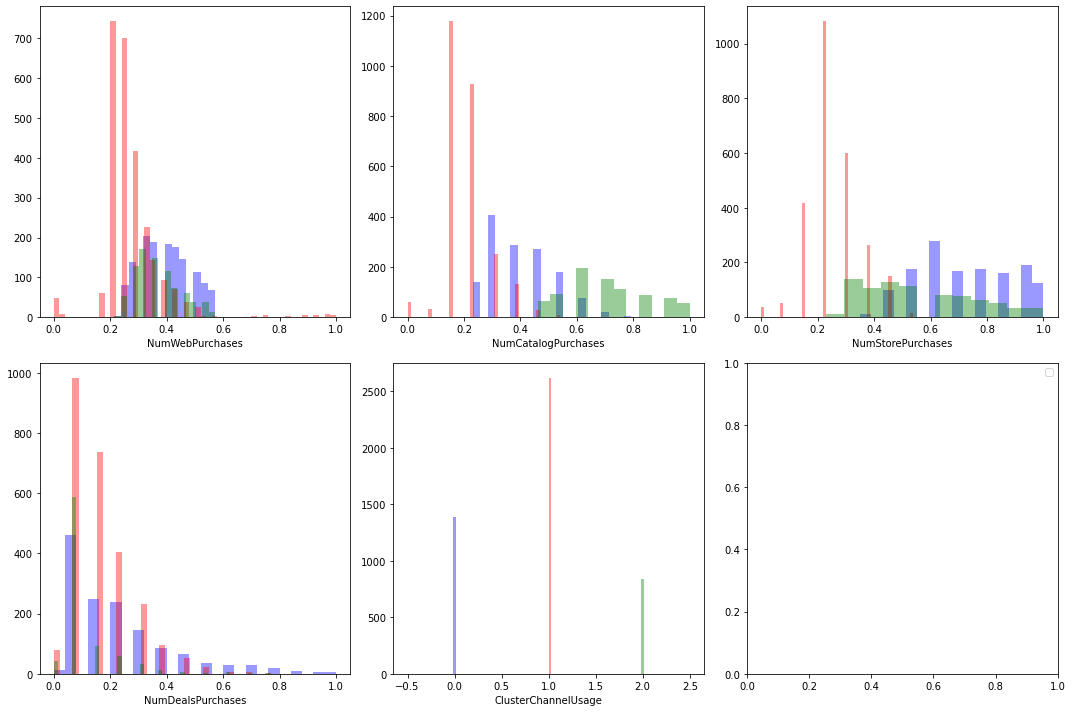

In [164]:
fig, axis = plt.subplots(2,3, figsize=(15,10), sharex=False)
for i, column in enumerate(minmax_ChannelUsage.columns):
    sns.distplot(Cluster0_ChannelUsage[column],color='blue',label='Cluster 0', kde = False,ax=axis[i//3,i%3])
    sns.distplot(Cluster1_ChannelUsage[column],color='red',label='Cluster 1', kde = False, ax=axis[i//3,i%3])
    sns.distplot(Cluster2_ChannelUsage[column],color='green',label='Cluster 2', kde = False, ax=axis[i//3,i%3])
plt.tight_layout()
plt.legend()

### DBSCAN

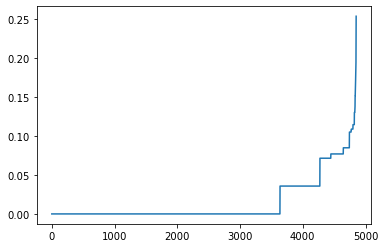

In [165]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(minmax_ChannelUsage)
distances, indices = nbrs.kneighbors(minmax_ChannelUsage)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [166]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples = 5)  
dbscan_clusters = dbscan.fit_predict(minmax_ChannelUsage)
dbscan_clusters
n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise = list(dbscan_clusters).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

Estimated number of clusters: 4
Estimated number of noise points: 0


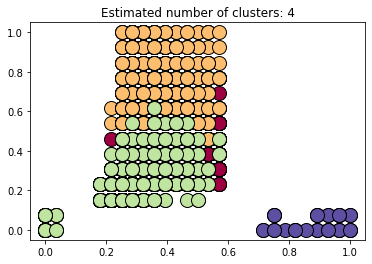

In [167]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = scale_channel_usage[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = scale_channel_usage[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

### SOM

In [168]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [169]:
import pandas as pd
import numpy as np
from minisom import MiniSom 

In [170]:
data_channelusage = UpColours07_dummies[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']].copy()

In [171]:
ChannelUsage_np = np.float32(data_channelusage.values)

In [172]:
minmaxscaler = MinMaxScaler()
Scaled_ChannelUsage = minmaxscaler.fit(ChannelUsage_np).transform(ChannelUsage_np)

minmax_ChannelUsage_SOM = pd.DataFrame(Scaled_ChannelUsage, columns=data_channelusage.columns)
minmax_ChannelUsage_SOM

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases
0,0.285714,0.307692,0.615385,0.076923
1,0.428571,0.384615,1.000000,0.230769
2,0.500000,0.692308,0.846154,0.076923
3,0.357143,0.307692,0.461538,0.538462
4,0.357143,0.538462,0.846154,0.076923
...,...,...,...,...
4847,0.285714,0.153846,0.230769,0.230769
4848,0.357143,0.538462,0.384615,0.076923
4849,0.357143,0.538462,0.923077,0.076923
4850,0.535714,0.461538,0.461538,0.076923


In [173]:
ChannelUsage_SOM = MiniSom(
            x = 20,
            y=20,
            input_len = len(minmax_ChannelUsage_SOM.columns),
            learning_rate = 0.5,
            topology = "rectangular"
            )

In [174]:
ChannelUsage_SOM.pca_weights_init(Scaled_ChannelUsage)

In [175]:
ChannelUsage_SOM.train(data = Scaled_ChannelUsage, num_iteration=100)

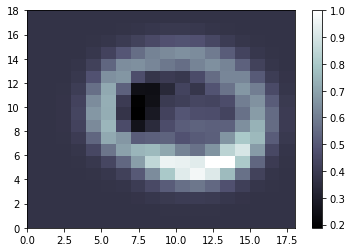

In [176]:
from pylab import plot,show,pcolor,colorbar
pcolor(ChannelUsage_SOM.distance_map().T[1:-1,1:-1], cmap='bone')
colorbar()
show()

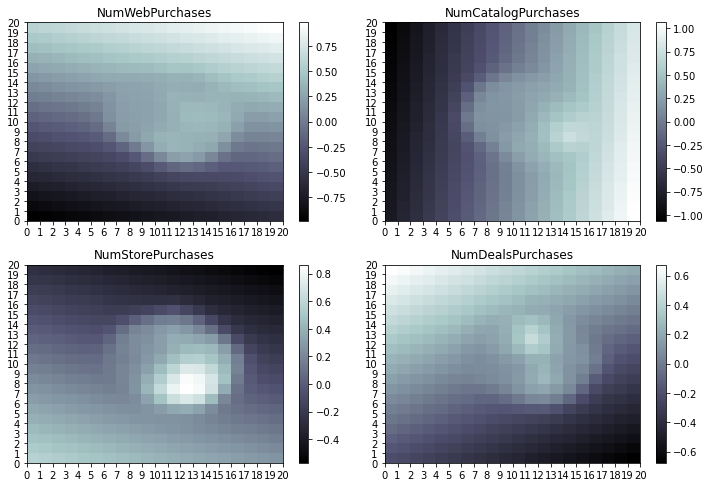

In [177]:
ChannelUsageW = ChannelUsage_SOM.get_weights()

# Create a new figure
plt.figure(figsize=(10, 10))

# Add subplots to the current figure with all the component planes
for i, f in enumerate(minmax_ChannelUsage_SOM.columns):
    plt.subplot(3, 2, i+1)  #subplot(nrows, ncols, index)
    plt.title(f)  #f - feature name for each graph
    plt.pcolor(ChannelUsageW[:,:,i].T, cmap='bone')
    plt.xticks(np.arange(20+1))
    plt.yticks(np.arange(20+1))
    colorbar()
    
# Fit plots within your figure cleanly
plt.tight_layout()
# Display the figure
plt.show()

### Hierarchical Clustering

In [178]:
ChannelUsageW = np.reshape(ChannelUsageW, (20*20, len(Scaled_ChannelUsage[0])))

In [179]:
hierar_ChannelUsage = linkage(ChannelUsageW, 'ward') 

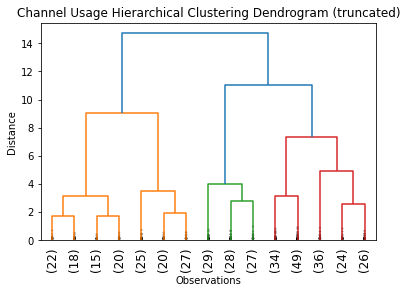

In [180]:
plt.title('Channel Usage Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(
    hierar_ChannelUsage,
    truncate_mode='lastp',  
    p=15,  
    show_leaf_counts=True,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, 
)

plt.show()

In [181]:
kmeans_ChannelUsage = KMeans(n_clusters = 3).fit(ChannelUsageW)

In [182]:
clusters_Channel = kmeans_ChannelUsage.labels_
clusters_Channel

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [183]:
clusters_Channel = np.reshape(clusters_Channel, (20,20))

In [184]:
ChannelUsage_clusters = []

for obs in Scaled_ChannelUsage:
        bmu = ChannelUsage_SOM.winner(obs)
        x_coord = bmu[0]
        y_coord = bmu[1]
        ChannelUsage_clusters.append(clusters_Channel[x_coord,y_coord])
        
ChannelUsage_clusters = pd.DataFrame(data = ChannelUsage_clusters,columns=['Cluster'])
ChannelUsage_clusters

,Cluster
0,1
1,1
2,1
3,1
4,1
...,...
4847,1
4848,1
4849,1
4850,1


#### <font color='#f0690a'>Aggregation of perspectives</font> <a class="anchor" id="second-bullet"></a>

In [185]:
PU = product_usage.reset_index()

In [186]:
CV = minmax_CustomerValue.copy()

In [187]:
CU = minmax_ChannelUsage.reset_index()
CU.rename(columns={'index':'ID'}, inplace=True)

In [188]:
Agg = pd.concat([PU['ClusterProdUsage'], CV['ClusterCustValue'], CU['ClusterChannelUsage']], axis=1)
Agg.head(10)

,ClusterProdUsage,ClusterCustValue,ClusterChannelUsage
0,1,1,0
1,0,1,0
2,0,1,2
3,2,0,0
4,0,1,0
5,0,0,0
6,0,1,2
7,2,0,1
8,2,0,1
9,0,1,2


In [189]:
Agg.groupby(['ClusterProdUsage','ClusterCustValue','ClusterChannelUsage']).agg(Customer_count = pd.NamedAgg(column = "ClusterChannelUsage", aggfunc="count"))

Customer_count
ClusterProdUsage ClusterCustValue ClusterChannelUsage                
0                0                0                               244
                                  1                                38
                                  2                                32
                 1                0                               560
                                  1                                67
                                  2                               402
1                0                0                                 1
                 1                0                               349
                                  1                                42
                                  2                               367
2                0                0                               180
                                  1                              2430
                                  2                                17
                 1                0                                57
                                  1                                42
                                  2                                24

In [190]:
for pu in Agg['ClusterProdUsage'].unique():
    df = Agg[Agg['ClusterProdUsage']==pu]
    for cv in Agg['ClusterCustValue'].unique():
        df1 =df[df['ClusterCustValue']==cv]
        for cu in Agg['ClusterChannelUsage'].unique():
            df2 = df1[df1['ClusterChannelUsage']==cu]
            print(pu, cv, cu, df2.shape)

1 1 0 (349, 3)
1 1 2 (367, 3)
1 1 1 (42, 3)
1 0 0 (1, 3)
1 0 2 (0, 3)
1 0 1 (0, 3)
0 1 0 (560, 3)
0 1 2 (402, 3)
0 1 1 (67, 3)
0 0 0 (244, 3)
0 0 2 (32, 3)
0 0 1 (38, 3)
2 1 0 (57, 3)
2 1 2 (24, 3)
2 1 1 (42, 3)
2 0 0 (180, 3)
2 0 2 (17, 3)
2 0 1 (2430, 3)


### <font color='#f0690a'>Customer offer acceptancence</font> <a class="anchor" id="second-bullet"></a>

In [191]:
Cust_acceptance = UpColours07_dummies[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','Complain']].copy()
Cust_acceptance

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain
ID,,,,,,
70003082,0.0,0.0,0.0,0.0,0.0,0.0
70003084,0.0,0.0,0.0,0.0,0.0,0.0
70003085,0.0,0.0,0.0,1.0,0.0,0.0
70003087,0.0,0.0,0.0,0.0,0.0,0.0
70003089,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
70013075,0.0,0.0,0.0,0.0,0.0,0.0
70013077,0.0,1.0,1.0,0.0,0.0,0.0
70013078,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
Cust_acceptance.sum()

AcceptedCmp1    389.0
AcceptedCmp2    326.0
AcceptedCmp3    362.0
AcceptedCmp4    309.0
AcceptedCmp5     68.0
Complain         57.0
dtype: float64

In [193]:
#for campaign in Cust_acceptance.columns:
#    new_df = UpColours07_dummies[UpColours07_dummies[campaign] == 1]
#    print(campaign, new_df.describe())

In [194]:
#UpColours07_visits = UpColours07_dummies.groupby(['NumWebVisitsMonth']).describe().transpose()
#UpColours07_visits

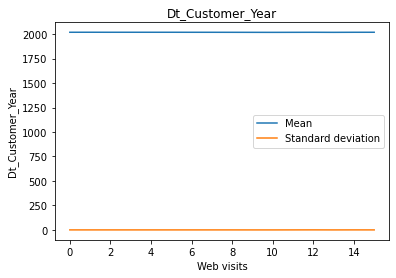

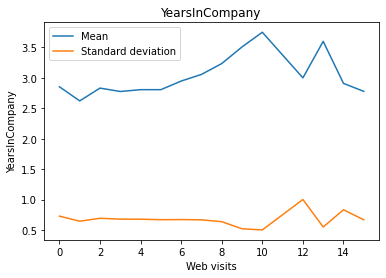

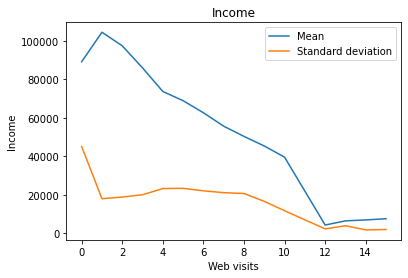

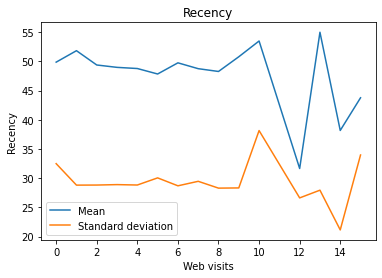

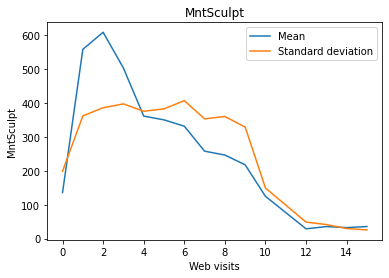

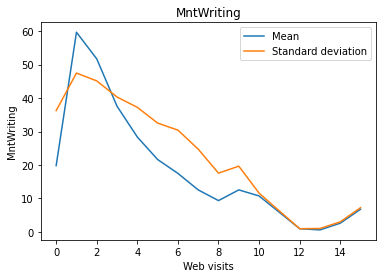

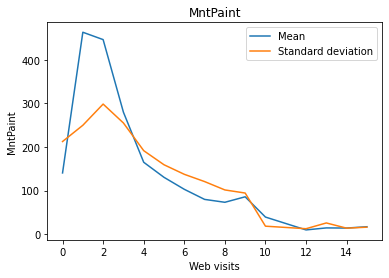

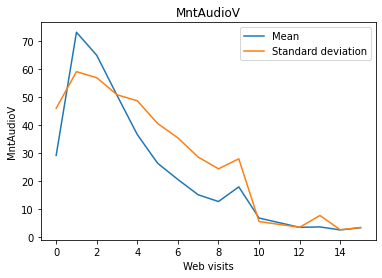

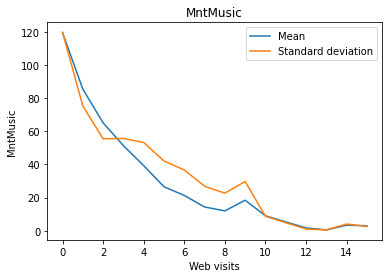

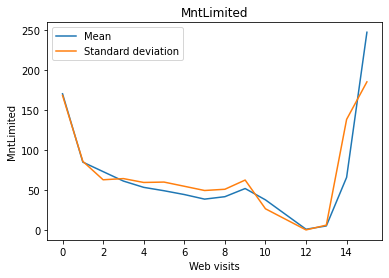

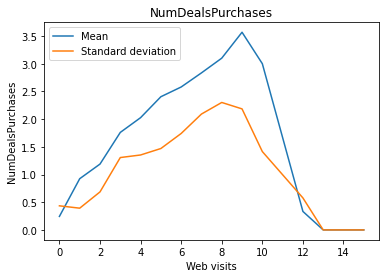

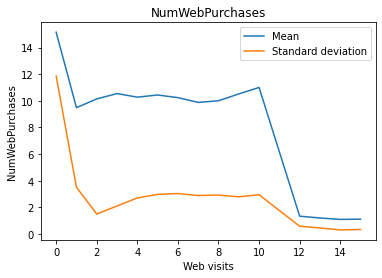

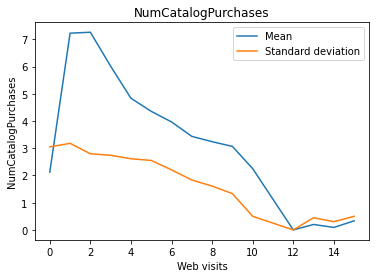

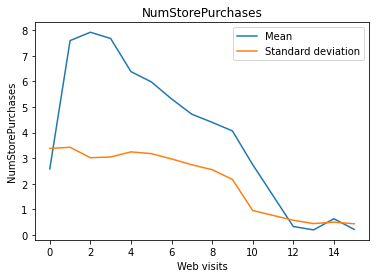

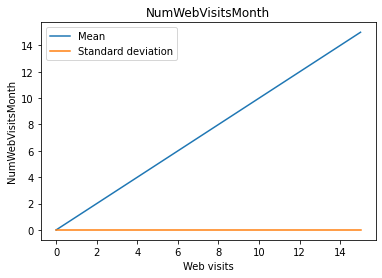

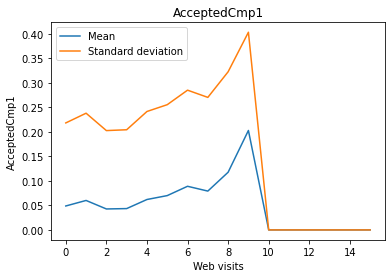

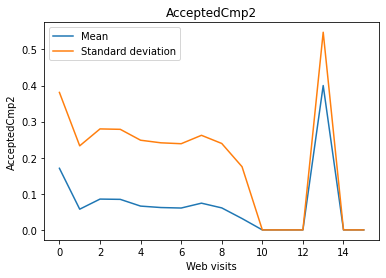

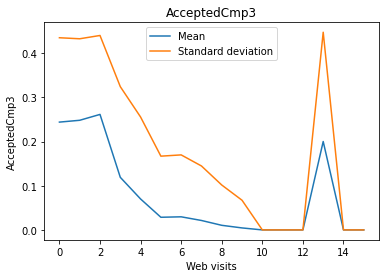

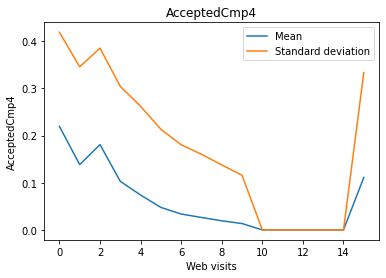

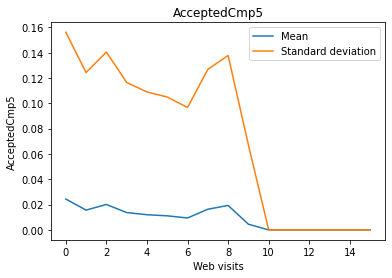

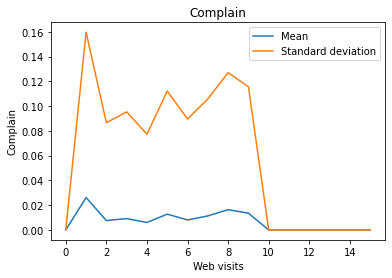

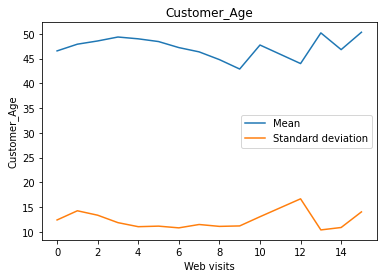

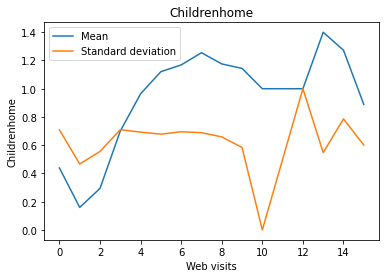

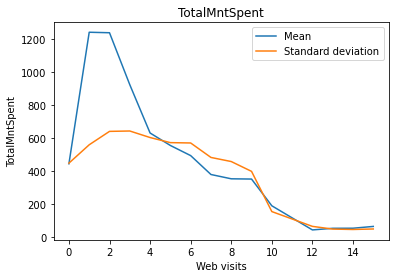

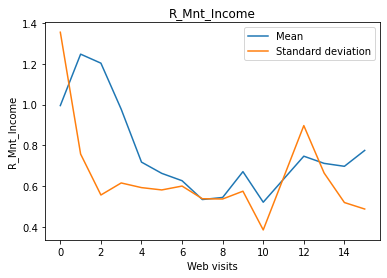

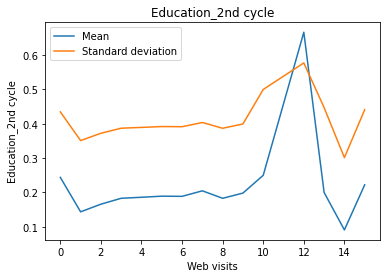

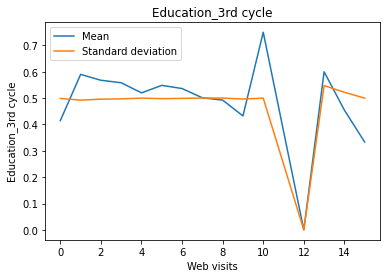

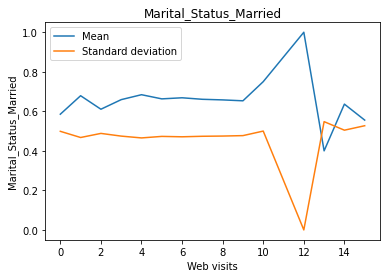

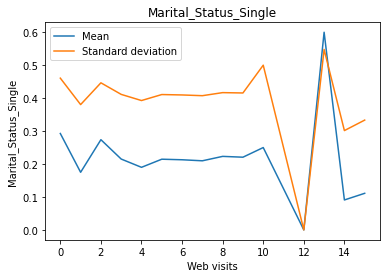

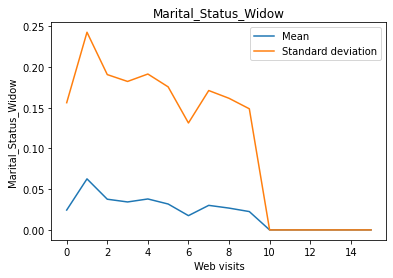

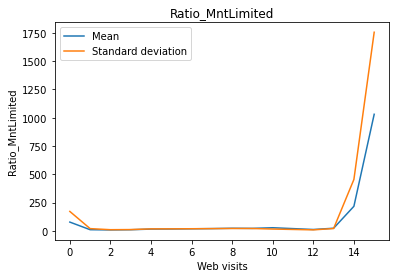

In [195]:
for var in UpColours07_dummies.columns:
    visits = UpColours07_dummies.groupby(['NumWebVisitsMonth']).agg(average=pd.NamedAgg(column=var, aggfunc="mean"),
            std=pd.NamedAgg(column=var, aggfunc="std"), max=pd.NamedAgg(column=var, aggfunc="max"), min=pd.NamedAgg(column=var, aggfunc="min"))
    plt.plot(visits["average"], label = "Mean")
    plt.plot(visits["std"], label = "Standard deviation")
    plt.title("{}".format(var))
    plt.legend()
    plt.xlabel("Web visits")
    plt.ylabel(var)
    plt.show()

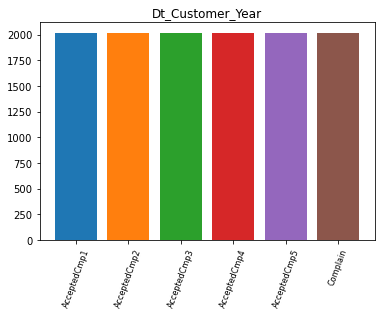

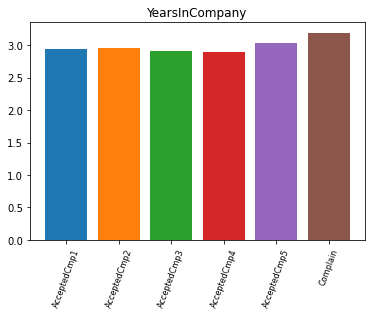

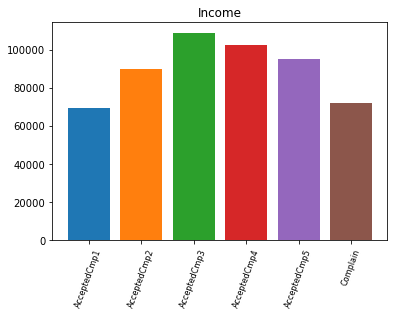

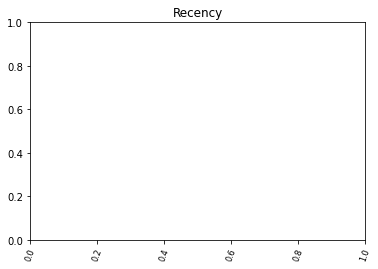

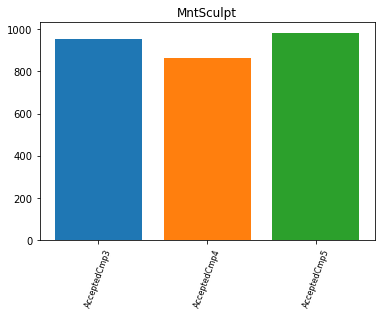

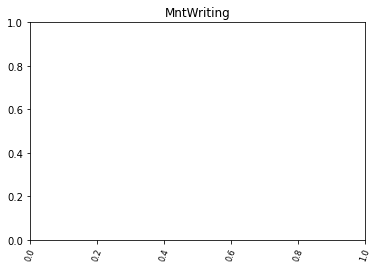

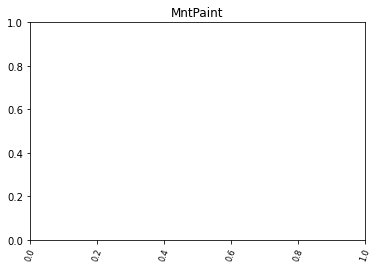

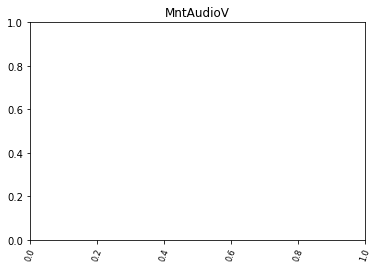

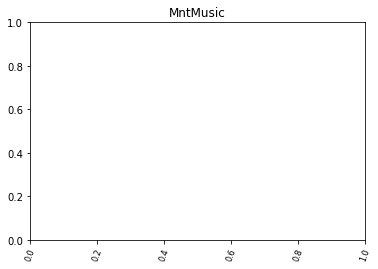

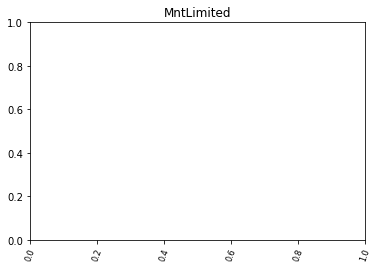

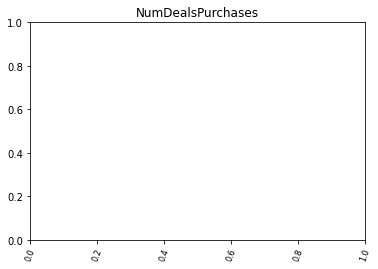

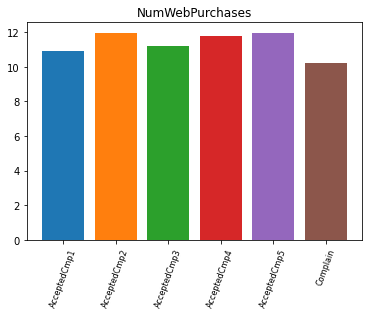

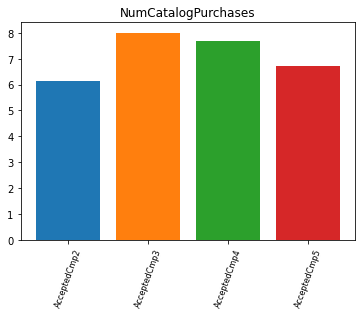

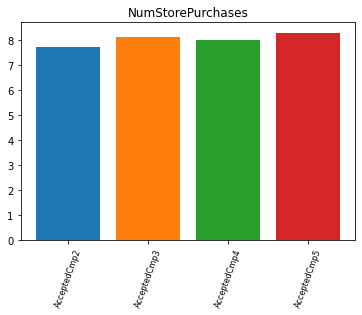

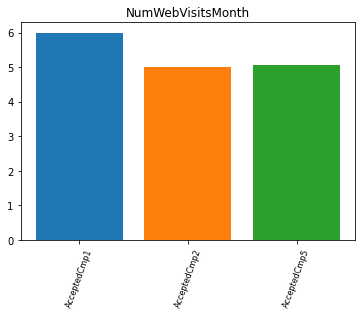

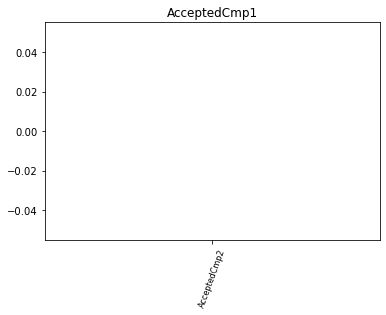

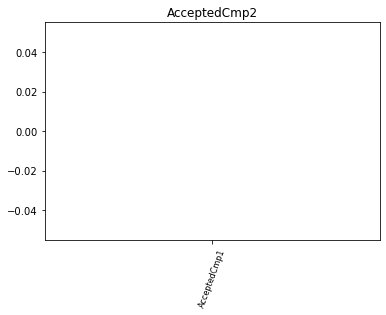

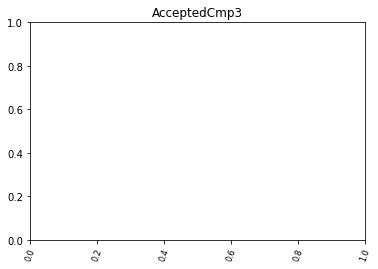

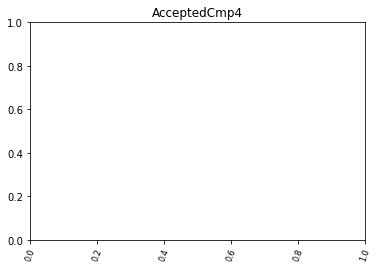

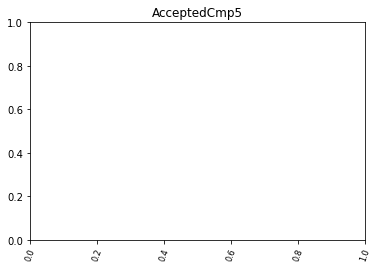

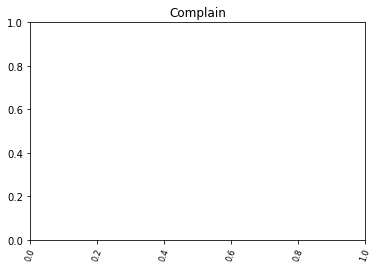

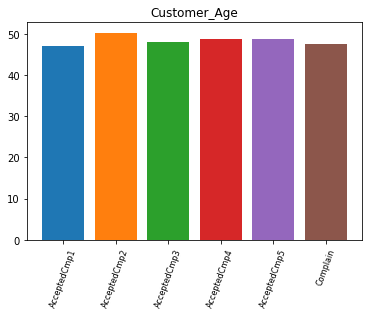

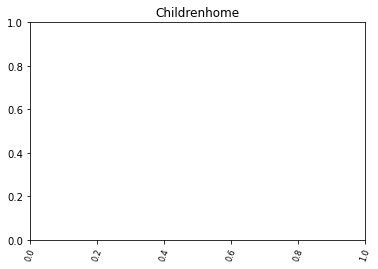

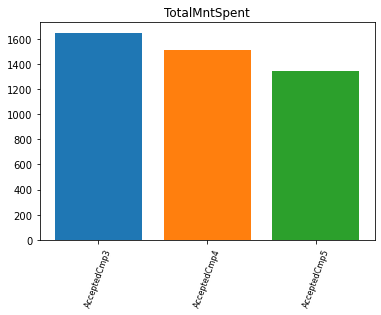

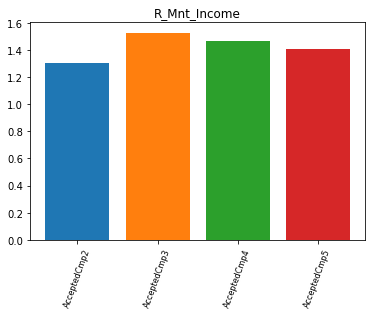

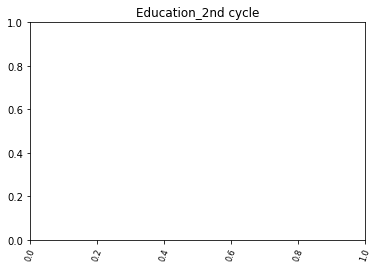

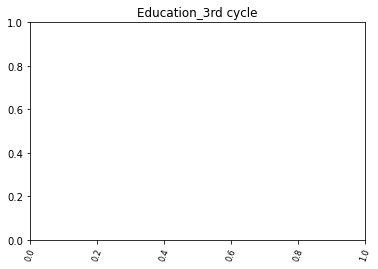

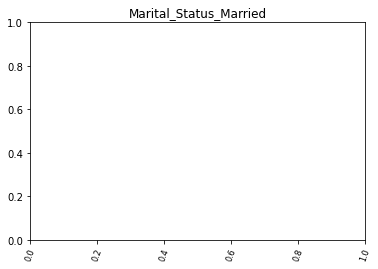

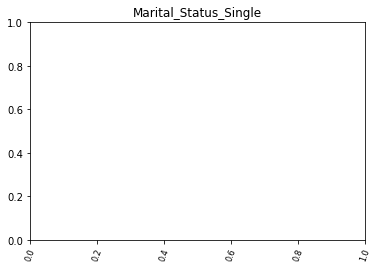

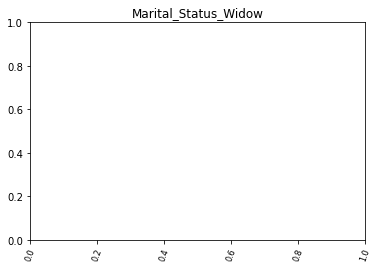

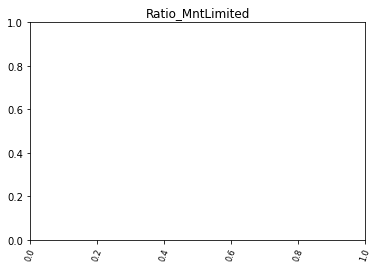

In [196]:
for var in UpColours07_dummies.columns:
    for campaign in Cust_acceptance.columns:
        mean = UpColours07_dummies[UpColours07_dummies[campaign] == 1][var].mean()
        std = UpColours07_dummies[UpColours07_dummies[campaign] == 1][var].std()
        if var != campaign:   
            if std != 0:
                if std/mean <= 0.5:
                    plt.bar(campaign, UpColours07_dummies[UpColours07_dummies[campaign] == 1][var].mean())
            else:
                plt.bar(campaign, UpColours07_dummies[UpColours07_dummies[campaign] == 1][var].mean())
    plt.title("{}".format(var))
    plt.xticks(rotation=70, fontsize=8)
    plt.show()

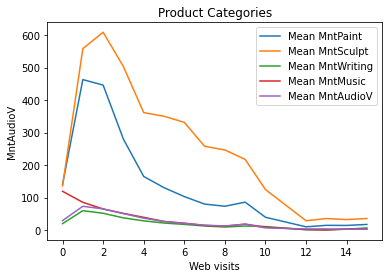

In [197]:
for var in ['MntPaint', 'MntSculpt', 'MntWriting', 'MntMusic', 'MntAudioV']:
    visits = UpColours07_dummies.groupby(['NumWebVisitsMonth']).agg(average=pd.NamedAgg(column=var, aggfunc="mean"))
    plt.plot(visits["average"], label = "Mean {}".format(var))
    plt.title("Product Categories")
    plt.legend()
plt.xlabel("Web visits")
plt.ylabel(var)
plt.show()

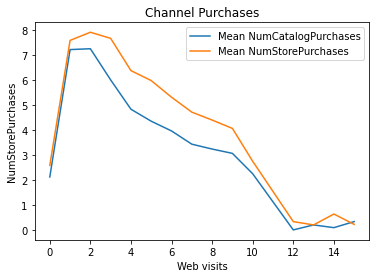

In [198]:
for var in ['NumCatalogPurchases', 'NumStorePurchases']:
    visits = UpColours07_dummies.groupby(['NumWebVisitsMonth']).agg(average=pd.NamedAgg(column=var, aggfunc="mean"))
    plt.plot(visits["average"], label = "Mean {}".format(var))
    plt.title("Channel Purchases")
    plt.legend()
plt.xlabel("Web visits")
plt.ylabel(var)
plt.show()